# **INTRODUCTION**

Logistic industry plays the key role in various industries as this industry is reponsible for supply chain processes from procuring raw materials to delivering products to consumers. However, it is currently facing several challenges that impact efficiency, cost, and service speed [1](https://ble.telkomuniversity.ac.id/en/key-challenges-in-the-logistics-industry-how-to-overcome-them/)

This project will be focused on supply chain and logistic issues that arise in the industry, including risk assessment and predicting delay probability

# **ABOUT DATASET**

Dataset for this project was downloaded from [Kaggle](https://www.kaggle.com/datasets/shashwatwork/dataco-smart-supply-chain-for-big-data-analysis/data?select=DescriptionDataCoSupplyChain.csv). This supply chain dataset was used by DataCo Global company for their analysis which include detailed information about customer, shipping, and purchased products. This dataset was collected from January 2015 to September 2017

Features overview :
| Column Name | Description |
|------|------|
| `Type` | Type of transaction made  |
| `Days for shipping (real)` |  Actual shipping days of the purchased product  |
| `Days for shipment (scheduled)` |  Days of scheduled delivery of the purchased product |
| `Benefit per order` | Earnings per order placed  |
| `Sales per customer` | Total sales per customer made per customer  |
| `Delivery Status` |  Delivery status of orders: Advance shipping , Late delivery , Shipping canceled , Shipping on time  |
| `Late_delivery_risk` |  Categorical variable that indicates if sending is late (1), it is not late (0)  |
| `Category Id` | Product category code |
| `Category Name` |  Description of the product category  |
| `Customer City` | City where the customer made the purchase   |
| `Customer Country` | Country where the customer made the purchase  |
| `Customer Email` | Customer's email  |
| `Customer Fname` | Customer  first name|
| `Customer Id` | Customer ID |
| `Customer Lname` | Customer last name  |
| `Customer Password` |Masked customer key  |
| `Customer Segment` |  Types of Customers: Consumer , Corporate , Home Office  |
| `Customer State` | State to which the store where the purchase is registered|
| `Customer Street` | Street to which the store where the purchase is registered|
| `Customer Zipcode` |  Customer zipcode|
| `Department Id` |  Department code of store|
|`Department Name` |  Department name of store|
| `Latitude` |  Latitude corresponding to location of store |
| `Longitude` |    Longitude corresponding to location of store |
| `Market` |   Market to where the order is delivered : Africa , Europe , LATAM , Pacific Asia , USCA|
| `Order City` | Destination city of the order|
| `Order Country` |  Destination country of the order|
| `order date (DateOrders)` |  Date on which the order is made|
|`Order Id` | Order code|
| `Order Item Cardprod Id` |  Product code generated through the RFID reader |
| `Order Item Discount` |    Order item discount value |
| `Order Item Discount Rate` |  Order item discount percentage|
| `Order Item Id` | Order item code|
| `Order Item Product Price` | Price of products without discount |
| `Order Profit Ratio` | Order Item Profit Ratio  |
| `Order Item Quantity` |Number of products per order  |
| `Sales` |  Value in sales  |
| `Order Item Total` | Total amount per order|
| `Order Profit per Order` | Order Profit per Order|
| `Order Region` |  Region of the world where the order is delivered :  Southeast Asia ,South Asia ,Oceania ,Eastern Asia, West Asia , West of USA , US Center , West Africa, Central Africa ,North Africa ,Western Europe ,Northern , Caribbean , South America ,East Africa ,Southern Europe , East of USA ,Canada ,Southern Africa , Central Asia ,  Europe , Central America, Eastern Europe , South of  USA |
| `Order State` | State of the region where the order is delivered|
|`Order Status` |   Order Status : COMPLETE , PENDING , CLOSED , PENDING_PAYMENT ,CANCELED , PROCESSING ,SUSPECTED_FRAUD ,ON_HOLD ,PAYMENT_REVIEW|
| `Product Card Id` |  Product code |
| `Product Category Id` |    Product category code|
| `Product Description` |  Product Description|
| `Product Image` | Link of visit and purchase of the product|
| `Product Name` |  Product Name|
| `Product Price` |  Product Price
|`Product Status` |  Status of the product stock :If it is 1 not available , 0 the product is available |
| `Shipping date (DateOrders)` |  Exact date and time of shipment |
| `Shipping Mode` | The following shipping modes are presented : Standard Class , First Class , Second Class , Same Day |




# **IMPORT LIBRARY**

In [ ]:
!pip install scipy==1.11.4
!pip install dalex
!pip install scikit-plot
!pip install shap
!pip install lime
!pip install optuna


import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# libraries for geospatial
import geopandas as gpd
from shapely.geometry import Point
import folium
from folium.plugins import HeatMap
from geopy.geocoders import Nominatim

# libraries for preprocessing
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder

# libraries for model
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from statsmodels.stats.outliers_influence import variance_inflation_factor

# library for hyperparameter tuning
import optuna

# library for metrics
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix, classification_report, f1_score, precision_score, roc_auc_score, make_scorer

import dalex as dx
import scikitplot as skplt
import shap
from lime.lime_tabular import LimeTabularExplainer

  Using cached dalex-1.7.2.tar.gz (1.0 MB)
  Preparing metadata (setup.py) ... done
  Created wheel for dalex: filename=dalex-1.7.2-py3-none-any.whl size=1042898 sha256=cfb79f5c39683045894da771f66074a8be93edfe489501707e5ac9b2d7872bbd
  Stored in directory: /root/.cache/pip/wheels/17/0a/3a/8c988bdca6acd7ce4aa949726b26c382ad1635e065bf83a175
Successfully built dalex
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 7.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=c7667ebf1adb658caf30fd89d4720c1fec45769ce6895dc8f14c9e92525574b7
  Stored in directory: /root/.cache/pip/wheels/e7/5d/0e/4b4fff9a47468fed5633211fb3b76d1db43fe806a17fb7486a
Successfully built lime
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.9/400.9 kB 12.5 MB/s eta 0:00:00


# **LOAD DATA**

In [ ]:
# connect to google drive
from google.colab import drive
drive.mount('/content/drive')

folder_path = '/content/drive/My Drive/Bootcamp/Final Project/Data Science/'
data_path = folder_path + 'DataCoSupplyChainDataset.csv'
data_path

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


'/content/drive/My Drive/Bootcamp/Final Project/Data Science/DataCoSupplyChainDataset.csv'

In [ ]:
# load data
df = pd.read_csv(data_path, delimiter = ',', encoding='latin-1')

# check the first 5 rows to get overview
df.head()

Type  Days for shipping (real)  Days for shipment (scheduled)  \
0     DEBIT                         3                              4   
1  TRANSFER                         5                              4   
2      CASH                         4                              4   
3     DEBIT                         3                              4   
4   PAYMENT                         2                              4   

   Benefit per order  Sales per customer   Delivery Status  \
0          91.250000          314.640015  Advance shipping   
1        -249.089996          311.359985     Late delivery   
2        -247.779999          309.720001  Shipping on time   
3          22.860001          304.809998  Advance shipping   
4         134.210007          298.250000  Advance shipping   

   Late_delivery_risk  Category Id   Category Name Customer City  \
0                   0           73  Sporting Goods        Caguas   
1                   1           73  Sporting Goods        Caguas   
2                   0           73  Sporting Goods      San Jose   
3                   0           73  Sporting Goods   Los Angeles   
4                   0           73  Sporting Goods        Caguas   

  Customer Country Customer Email Customer Fname  Customer Id Customer Lname  \
0      Puerto Rico      XXXXXXXXX          Cally        20755       Holloway   
1      Puerto Rico      XXXXXXXXX          Irene        19492           Luna   
2          EE. UU.      XXXXXXXXX        Gillian        19491      Maldonado   
3          EE. UU.      XXXXXXXXX           Tana        19490           Tate   
4      Puerto Rico      XXXXXXXXX           Orli        19489      Hendricks   

  Customer Password Customer Segment Customer State           Customer Street  \
0         XXXXXXXXX         Consumer             PR  5365 Noble Nectar Island   
1         XXXXXXXXX         Consumer             PR          2679 Rustic Loop   
2         XXXXXXXXX         Consumer             CA      8510 Round Bear Gate   
3         XXXXXXXXX      Home Office             CA           3200 Amber Bend   
4         XXXXXXXXX        Corporate             PR  8671 Iron Anchor Corners   

   Customer Zipcode  Department Id Department Name   Latitude   Longitude  \
0             725.0              2         Fitness  18.251453  -66.037056   
1             725.0              2         Fitness  18.279451  -66.037064   
2           95125.0              2         Fitness  37.292233 -121.881279   
3           90027.0              2         Fitness  34.125946 -118.291016   
4             725.0              2         Fitness  18.253769  -66.037048   

         Market  Order City Order Country  Order Customer Id  \
0  Pacific Asia      Bekasi     Indonesia              20755   
1  Pacific Asia     Bikaner         India              19492   
2  Pacific Asia     Bikaner         India              19491   
3  Pacific Asia  Townsville     Australia              19490   
4  Pacific Asia  Townsville     Australia              19489   

  order date (DateOrders)  Order Id  Order Item Cardprod Id  \
0         1/31/2018 22:56     77202                    1360   
1         1/13/2018 12:27     75939                    1360   
2         1/13/2018 12:06     75938                    1360   
3         1/13/2018 11:45     75937                    1360   
4         1/13/2018 11:24     75936                    1360   

   Order Item Discount  Order Item Discount Rate  Order Item Id  \
0            13.110000                      0.04         180517   
1            16.389999                      0.05         179254   
2            18.030001                      0.06         179253   
3            22.940001                      0.07         179252   
4            29.500000                      0.09         179251   

   Order Item Product Price  Order Item Profit Ratio  Order Item Quantity  \
0                    327.75                     0.29                    1   
1                    327.75             

# **DATA UNDERSTANDING**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 53 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Id                    180519 non-null  int64  
 8   Category Name                  180519 non-null  object 
 9   Customer City                  180519 non-null  object 
 10  Customer Country               180519 non-null  object 
 11  Customer Email                 180519 non-null  object 
 12  Customer Fname                

**Observations :**
1. Dataset contains 180,519 columns and 53 columns
2. `order date (DateOrders)` and `shipping date (DateOrders)` have object data type instead of datetime. These columns will be converted from object to datetime
3. `Order Zipcode` has lots of missing values
4. `Product Description` will be dropped since no values in this column


In [ ]:
# convert data type
df['order date (DateOrders)'] = pd.to_datetime(df['order date (DateOrders)'])
df['shipping date (DateOrders)'] = pd.to_datetime(df['shipping date (DateOrders)'])

# check dataset again
df.head()

Type  Days for shipping (real)  Days for shipment (scheduled)  \
0     DEBIT                         3                              4   
1  TRANSFER                         5                              4   
2      CASH                         4                              4   
3     DEBIT                         3                              4   
4   PAYMENT                         2                              4   

   Benefit per order  Sales per customer   Delivery Status  \
0          91.250000          314.640015  Advance shipping   
1        -249.089996          311.359985     Late delivery   
2        -247.779999          309.720001  Shipping on time   
3          22.860001          304.809998  Advance shipping   
4         134.210007          298.250000  Advance shipping   

   Late_delivery_risk  Category Id   Category Name Customer City  \
0                   0           73  Sporting Goods        Caguas   
1                   1           73  Sporting Goods        Caguas   
2                   0           73  Sporting Goods      San Jose   
3                   0           73  Sporting Goods   Los Angeles   
4                   0           73  Sporting Goods        Caguas   

  Customer Country Customer Email Customer Fname  Customer Id Customer Lname  \
0      Puerto Rico      XXXXXXXXX          Cally        20755       Holloway   
1      Puerto Rico      XXXXXXXXX          Irene        19492           Luna   
2          EE. UU.      XXXXXXXXX        Gillian        19491      Maldonado   
3          EE. UU.      XXXXXXXXX           Tana        19490           Tate   
4      Puerto Rico      XXXXXXXXX           Orli        19489      Hendricks   

  Customer Password Customer Segment Customer State           Customer Street  \
0         XXXXXXXXX         Consumer             PR  5365 Noble Nectar Island   
1         XXXXXXXXX         Consumer             PR          2679 Rustic Loop   
2         XXXXXXXXX         Consumer             CA      8510 Round Bear Gate   
3         XXXXXXXXX      Home Office             CA           3200 Amber Bend   
4         XXXXXXXXX        Corporate             PR  8671 Iron Anchor Corners   

   Customer Zipcode  Department Id Department Name   Latitude   Longitude  \
0             725.0              2         Fitness  18.251453  -66.037056   
1             725.0              2         Fitness  18.279451  -66.037064   
2           95125.0              2         Fitness  37.292233 -121.881279   
3           90027.0              2         Fitness  34.125946 -118.291016   
4             725.0              2         Fitness  18.253769  -66.037048   

         Market  Order City Order Country  Order Customer Id  \
0  Pacific Asia      Bekasi     Indonesia              20755   
1  Pacific Asia     Bikaner         India              19492   
2  Pacific Asia     Bikaner         India              19491   
3  Pacific Asia  Townsville     Australia              19490   
4  Pacific Asia  Townsville     Australia              19489   

  order date (DateOrders)  Order Id  Order Item Cardprod Id  \
0     2018-01-31 22:56:00     77202                    1360   
1     2018-01-13 12:27:00     75939                    1360   
2     2018-01-13 12:06:00     75938                    1360   
3     2018-01-13 11:45:00     75937                    1360   
4     2018-01-13 11:24:00     75936                    1360   

   Order Item Discount  Order Item Discount Rate  Order Item Id  \
0            13.110000                      0.04         180517   
1            16.389999                      0.05         179254   
2            18.030001                      0.06         179253   
3            22.940001                      0.07         179252   
4            29.500000                      0.09         179251   

   Order Item Product Price  Order Item Profit Ratio  Order Item Quantity  \
0                    327.75                     0.29                    1   
1                    327.75             

# **DATA INSPECTION**

## **Check and Handle Missing Values**

In [ ]:
# check missing values using .isnull()
df.isnull().sum() / len(df) * 100

Type                               0.000000
Days for shipping (real)           0.000000
Days for shipment (scheduled)      0.000000
Benefit per order                  0.000000
Sales per customer                 0.000000
Delivery Status                    0.000000
Late_delivery_risk                 0.000000
Category Id                        0.000000
Category Name                      0.000000
Customer City                      0.000000
Customer Country                   0.000000
Customer Email                     0.000000
Customer Fname                     0.000000
Customer Id                        0.000000
Customer Lname                     0.004432
Customer Password                  0.000000
Customer Segment                   0.000000
Customer State                     0.000000
Customer Street                    0.000000
Customer Zipcode                   0.001662
Department Id                      0.000000
Department Name                    0.000000
Latitude                           0.000000
Longitude                          0.000000
Market                             0.000000
Order City                         0.000000
Order Country                      0.000000
Order Customer Id                  0.000000
order date (DateOrders)            0.000000
Order Id                           0.000000
Order Item Cardprod Id             0.000000
Order Item Discount                0.000000
Order Item Discount Rate           0.000000
Order Item Id                      0.000000
Order Item Product Price           0.000000
Order Item Profit Ratio            0.000000
Order Item Quantity                0.000000
Sales                              0.000000
Order Item Total                   0.000000
Order Profit Per Order             0.000000
Order Region                       0.000000
Order State                        0.000000
Order Status                       0.000000
Order Zipcode                     86.239676
Product Card Id                    0.000000
Product Category Id                0.000000
Product Description              100.000000
Product Image                      0.000000
Product Name                       0.000000
Product Price                      0.000000
Product Status                     0.000000
shipping date (DateOrders)         0.000000
Shipping Mode                      0.000000
dtype: float64

In [ ]:
# check missing values using .unique()
for col in df.columns :
  print(f'Unique values for {col} :')
  print(df[col].unique())

Unique values for Type :
['DEBIT' 'TRANSFER' 'CASH' 'PAYMENT']
Unique values for Days for shipping (real) :
[3 5 4 2 6 0 1]
Unique values for Days for shipment (scheduled) :
[4 1 2 0]
Unique values for Benefit per order :
[  91.25      -249.0899963 -247.7799988 ... -103.9700012 -237.5899963
 -337.1000061]
Unique values for Sales per customer :
[314.6400146 311.3599854 309.7200012 ... 298.769989  403.7099915
 474.7600098]
Unique values for Delivery Status :
['Advance shipping' 'Late delivery' 'Shipping on time' 'Shipping canceled']
Unique values for Late_delivery_risk :
[0 1]
Unique values for Category Id :
[73 17 29 24 13 12  9 41 37 38 44  3 18 43 65 62 64  4  2 26 40 76 66 70
  6 11 16 36 10 63  5 60 45 59 67 61 68  7 72 69 71 75 35 34 33 32 31 30
 74 48 46]
Unique values for Category Name :
['Sporting Goods' 'Cleats' 'Shop By Sport' "Women's Apparel" 'Electronics'
 'Boxing & MMA' 'Cardio Equipment' 'Trade-In' "Kids' Golf Clubs"
 'Hunting & Shooting' 'Baseball & Softball' "Men's Foot

**Observation :**
1. Proportion of missing values in columns `Product Description` and `Order Zipcode`above 50%, thus, these columns will be dropped
2. `Customer Lname` and `Customer Zipcode` have few missing values (<1%)

In [ ]:
# Drop columns "Product Description" and "Order Zipcode"
df = df.drop(columns = ['Product Description', 'Order Zipcode'], axis=1)

In [ ]:
# Check missing values in columns "Customer Lname" and "Customer Zipcode"
df[df['Customer Lname'].isnull()]

Type  Days for shipping (real)  Days for shipment (scheduled)  \
41422      DEBIT                         5                              4   
50447      DEBIT                         2                              4   
86260   TRANSFER                         5                              4   
92621   TRANSFER                         2                              1   
97530      DEBIT                         4                              2   
120404  TRANSFER                         3                              4   
166129   PAYMENT                         2                              2   
167119   PAYMENT                         2                              4   

        Benefit per order  Sales per customer   Delivery Status  \
41422          165.360001          337.459992     Late delivery   
50447          213.690002          436.100006  Advance shipping   
86260          152.440002          419.950012     Late delivery   
92621           -4.860000          194.240005     Late delivery   
97530           82.540001          242.759995     Late delivery   
120404         157.830002          415.329987  Advance shipping   
166129         -59.279999          296.390015  Shipping on time   
167119          15.050000          200.710007  Advance shipping   

        Late_delivery_risk  Category Id         Category Name Customer City  \
41422                    1           63   Children's Clothing        Caguas   
50447                    0           66                Crafts      Palatine   
86260                    1           66                Crafts   Los Angeles   
92621                    1           76      Women's Clothing        Caguas   
97530                    1           65  Consumer Electronics   San Antonio   
120404                   0           66                Crafts  Fayetteville   
166129                   0           63   Children's Clothing      Honolulu   
167119                   0           76      Women's Clothing        Reseda   

       Customer Country Customer Email Customer Fname  Customer Id  \
41422       Puerto Rico      XXXXXXXXX            May        17937   
50447           EE. UU.      XXXXXXXXX      Contreras        14909   
86260           EE. UU.      XXXXXXXXX            Ray        18347   
92621       Puerto Rico      XXXXXXXXX      BlueOneal        17354   
97530           EE. UU.      XXXXXXXXX           York        14446   
120404          EE. UU.      XXXXXXXXX         Farley        14870   
166129          EE. UU.      XXXXXXXXX             Le        17929   
167119          EE. UU.      XXXXXXXXX           Huff        20439   

       Customer Lname Customer Password Customer Segment Customer State  \
41422             NaN         XXXXXXXXX        Corporate             PR   
50447             NaN         XXXXXXXXX        Corporate             IL   
86260             NaN         XXXXXXXXX        Corporate             CA   
92621             NaN         XXXXXXXXX        Corporate             PR   
97530             NaN         XXXXXXXXX      Home Office             TX   
120404            NaN         XXXXXXXXX         Consumer             NC   
166129            NaN         XXXXXXXXX      Home Office             HI   
167119            NaN         XXXXXXXXX      Home Office             CA   

                 Customer Street  Customer Zipcode  Department Id  \
41422            690 Cozy Meadow             725.0              4   
50447           2407 Dusty Mount           60067.0              4   
86260   131 Sunny Treasure Green           90027.0              4   
92621           9279 Quaking Key             725.0              4   
97530    2905 Quaking Concession           78240.0             10   
120404     2544 Broad Brook View           28314.0              4   
166129            8547 Old Drive           96822.0              4   
167119      7107 Blue Rise Place           91335.0              4   

       Department Name   Latitude   Longitude        Market Order City  \

In [ ]:
df[df['Customer Zipcode'].isnull()]

Type  Days for shipping (real)  Days for shipment (scheduled)  \
35704    DEBIT                         2                              1   
46440  PAYMENT                         4                              4   
82511    DEBIT                         4                              4   

       Benefit per order  Sales per customer   Delivery Status  \
35704          66.379997          189.660004     Late delivery   
46440          10.910000           38.959999  Shipping on time   
82511          59.990002          299.959992  Shipping on time   

       Late_delivery_risk  Category Id         Category Name Customer City  \
35704                   1           65  Consumer Electronics            CA   
46440                   0           75           Video Games            CA   
82511                   0           63   Children's Clothing            CA   

      Customer Country Customer Email Customer Fname  Customer Id  \
35704          EE. UU.      XXXXXXXXX           Sara        14577   
46440          EE. UU.      XXXXXXXXX        Eugenia        17171   
82511          EE. UU.      XXXXXXXXX           Zena        14046   

      Customer Lname Customer Password Customer Segment Customer State  \
35704        Foreman         XXXXXXXXX         Consumer          95758   
46440         Slater         XXXXXXXXX        Corporate          95758   
82511        Elliott         XXXXXXXXX         Consumer          91732   

      Customer Street  Customer Zipcode  Department Id Department Name  \
35704       Elk Grove               NaN             10      Technology   
46440       Elk Grove               NaN              9      Discs Shop   
82511        El Monte               NaN              4         Apparel   

        Latitude   Longitude        Market Order City Order Country  \
35704  39.134159 -123.718552        Europe    Valence       Francia   
46440  38.408573 -121.449112  Pacific Asia     Manila     Filipinas   
82511  34.071892 -118.013886        Europe  Sheffield   Reino Unido   

       Order Customer Id order date (DateOrders)  Order Id  \
35704              14577     2017-11-02 18:31:00     71024   
46440              17171     2017-12-10 15:18:00     73618   
82511              14046     2017-10-26 00:29:00     70493   

       Order Item Cardprod Id  Order Item Discount  Order Item Discount Rate  \
35704                    1352            63.220001                      0.25   
46440                    1362             0.800000                      0.02   
82511                    1350            57.139999                      0.16   

       Order Item Id  Order Item Product Price  Order Item Profit Ratio  \
35704         174339                252.880005                     0.35   
46440         176933                 39.750000                     0.28   
82511         173808                357.100006                     0.20   

       Order Item Quantity       Sales  Order Item Total  \
35704                    1  252.880005        189.660004   
46440                    1   39.750000         38.959999   
82511                    1  357.100006        299.959992   

       Order Profit Per Order     Order Region            Order State  \
35704               66.379997   Western Europe  Auvernia-Ródano-Alpes   
46440               10.910000   Southeast Asia       Capital Nacional   
82511               59.990002  Northern Europe             Inglaterra   

          Order Status  Product Card Id  Product Category Id  \
35704         COMPLETE             1352                   65   
46440  PENDING_PAYMENT             1362                   75   
82511         COMPLETE             1350                   63   

                                           Product Image  \
35704  http://images.acmesports.sports/Industrial+con...   
46440  http://images.acmesports.sports/Fighting+video...   
82511   http://images.acmesports.sports/Children+heaters   

                          Product Name  Product Price  Product Status  \

For column `Customer Zipcode`, missing values can imputed by using existing value within the same `Customer City` which is "CA". Rows with `Customer City` = CA will be checked

In [ ]:
df[df['Customer City']=='CA']

Type  Days for shipping (real)  Days for shipment (scheduled)  \
35704    DEBIT                         2                              1   
46440  PAYMENT                         4                              4   
82511    DEBIT                         4                              4   

       Benefit per order  Sales per customer   Delivery Status  \
35704          66.379997          189.660004     Late delivery   
46440          10.910000           38.959999  Shipping on time   
82511          59.990002          299.959992  Shipping on time   

       Late_delivery_risk  Category Id         Category Name Customer City  \
35704                   1           65  Consumer Electronics            CA   
46440                   0           75           Video Games            CA   
82511                   0           63   Children's Clothing            CA   

      Customer Country Customer Email Customer Fname  Customer Id  \
35704          EE. UU.      XXXXXXXXX           Sara        14577   
46440          EE. UU.      XXXXXXXXX        Eugenia        17171   
82511          EE. UU.      XXXXXXXXX           Zena        14046   

      Customer Lname Customer Password Customer Segment Customer State  \
35704        Foreman         XXXXXXXXX         Consumer          95758   
46440         Slater         XXXXXXXXX        Corporate          95758   
82511        Elliott         XXXXXXXXX         Consumer          91732   

      Customer Street  Customer Zipcode  Department Id Department Name  \
35704       Elk Grove               NaN             10      Technology   
46440       Elk Grove               NaN              9      Discs Shop   
82511        El Monte               NaN              4         Apparel   

        Latitude   Longitude        Market Order City Order Country  \
35704  39.134159 -123.718552        Europe    Valence       Francia   
46440  38.408573 -121.449112  Pacific Asia     Manila     Filipinas   
82511  34.071892 -118.013886        Europe  Sheffield   Reino Unido   

       Order Customer Id order date (DateOrders)  Order Id  \
35704              14577     2017-11-02 18:31:00     71024   
46440              17171     2017-12-10 15:18:00     73618   
82511              14046     2017-10-26 00:29:00     70493   

       Order Item Cardprod Id  Order Item Discount  Order Item Discount Rate  \
35704                    1352            63.220001                      0.25   
46440                    1362             0.800000                      0.02   
82511                    1350            57.139999                      0.16   

       Order Item Id  Order Item Product Price  Order Item Profit Ratio  \
35704         174339                252.880005                     0.35   
46440         176933                 39.750000                     0.28   
82511         173808                357.100006                     0.20   

       Order Item Quantity       Sales  Order Item Total  \
35704                    1  252.880005        189.660004   
46440                    1   39.750000         38.959999   
82511                    1  357.100006        299.959992   

       Order Profit Per Order     Order Region            Order State  \
35704               66.379997   Western Europe  Auvernia-Ródano-Alpes   
46440               10.910000   Southeast Asia       Capital Nacional   
82511               59.990002  Northern Europe             Inglaterra   

          Order Status  Product Card Id  Product Category Id  \
35704         COMPLETE             1352                   65   
46440  PENDING_PAYMENT             1362                   75   
82511         COMPLETE             1350                   63   

                                           Product Image  \
35704  http://images.acmesports.sports/Industrial+con...   
46440  http://images.acmesports.sports/Fighting+video...   
82511   http://images.acmesports.sports/Children+heaters   

                          Product Name  Product Price  Product Status  \

**Observation :** there is no values in zipcode for the whole "CA". Since the column `Customer Zipcode` is too specific and will not give insightful information, this column will be dropped

In [ ]:
df = df.drop(columns = ['Customer Zipcode'], axis=1)

## **Check and Handle Duplicates**

In [ ]:
df.duplicated().sum()

0

## **Check and Handle Outliers**

In [ ]:
# check statistical summary
df.describe()

Days for shipping (real)  Days for shipment (scheduled)  \
count             180519.000000                  180519.000000   
mean                   3.497654                       2.931847   
min                    0.000000                       0.000000   
25%                    2.000000                       2.000000   
50%                    3.000000                       4.000000   
75%                    5.000000                       4.000000   
max                    6.000000                       4.000000   
std                    1.623722                       1.374449   

       Benefit per order  Sales per customer  Late_delivery_risk  \
count      180519.000000       180519.000000       180519.000000   
mean           21.974989          183.107609            0.548291   
min         -4274.979980            7.490000            0.000000   
25%             7.000000          104.379997            0.000000   
50%            31.520000          163.990005            1.000000   
75%            64.800003          247.399994            1.000000   
max           911.799988         1939.989990            1.000000   
std           104.433526          120.043670            0.497664   

         Category Id    Customer Id  Department Id       Latitude  \
count  180519.000000  180519.000000  180519.000000  180519.000000   
mean       31.851451    6691.379495       5.443460      29.719955   
min         2.000000       1.000000       2.000000     -33.937553   
25%        18.000000    3258.500000       4.000000      18.265432   
50%        29.000000    6457.000000       5.000000      33.144863   
75%        45.000000    9779.000000       7.000000      39.279617   
max        76.000000   20757.000000      12.000000      48.781933   
std        15.640064    4162.918106       1.629246       9.813646   

           Longitude  Order Customer Id        order date (DateOrders)  \
count  180519.000000      180519.000000                         180519   
mean      -84.915675        6691.379495  2016-06-12 17:47:04.669868544   
min      -158.025986           1.000000            2015-01-01 00:00:00   
25%       -98.446312        3258.500000            2015-09-21 13:49:00   
50%       -76.847908        6457.000000            2016-06-11 13:06:00   
75%       -66.370583        9779.000000            2017-03-01 08:42:00   
max       115.263077       20757.000000            2018-01-31 23:38:00   
std        21.433241        4162.918106                            NaN   

            Order Id  Order Item Cardprod Id  Order Item Discount  \
count  180519.000000           180519.000000        180519.000000   
mean    36221.894903              692.509764            20.664741   
min         1.000000               19.000000             0.000000   
25%     18057.000000              403.000000             5.400000   
50%     36140.000000              627.000000            14.000000   
75%     54144.000000             1004.000000            29.990000   
max     77204.000000             1363.000000           500.000000   
std     21045.379569              336.446807            21.800901   

       Order Item Discount Rate  Order Item Id  Order Item Product Price  \
count             180519.000000  180519.000000             180519.000000   
mean                   0.101668   90260.000000                141.232550   
min                    0.000000       1.000000                  9.990000   
25%                    0.040000   45130.500000                 50.000000   
50%                    0.100000   90260.000000                 59.990002   
75%                    0.160000  135389.500000                199.990005   
max                    0.250000  180519.000000               1999.989990   
std                    0.070415   52111.490959                139.732492   

       Order Item Profit Ratio  Order Item Quantity          Sales  \
count            180519.000000        180519.000000  180519.000000   
mean                  0.120647             2.127638     203.772

**Insights :**
1. `Days for shipping real (actual)` and `Days for shipment (scheduled)` : there is difference between order date and actual shipment date up to 6 days with an average of 3.5 days. This is slightly higher than the average scheduled delivery expectation of 3 days which indicate the inability to meet the planned shipment
2. `Benefit per Order` : this column is likely to have left-skewed distribution since mean < median which indicate that most orders generated relatively higher profit, but some transactions generated losses instead of profit
3. `Sales per Customer` : this column is likely to have right-skewed distribution since mean > median, indicating that only few customers contributed to high sales which increased the mean value
4. `Late_delivery_risk` : Based on median and 75th percentile, it is likely that most of orders were late. This needs to be confirmed later
5. `Product Status` : all the purchased products were available at the time of order
6. `Order Item Discount` :  this column is likely to have right-skewed distribution since mean > median with the maximum discount reached $500
7. `Order Item Discount Rate` : mean value is similar to median value (0.1), indicating that this column has normal distribution
8. `Benefir per Order` and `Order Profit per Order` : these columns have identic data distribution which may indicate same columns, thus, further investigation is necessary
9. `Order Item Product Price` and `Product Price` : these columns have identic data distribution which may indicate same columns, thus, further investigation is necessary


In [ ]:
# plot histogram and boxplot for numerical columns except for columns as follows
# 'Customer Id', 'Category Id', 'Department Id', 'Customer Zipcode', 'Order Customer Id', 'order date (DateOrders)',
# 'Order Id', 'Order Item Cardprod Id', 'Order Item Id'
excluded_cols = ['Customer Id', 'Category Id', 'Department Id', 'Customer Zipcode', 'Order Customer Id', 'order date (DateOrders)',
                 'Order Id', 'Order Item Cardprod Id', 'Order Item Id']
numeric_cols = [col for col in df.select_dtypes(include = 'number').columns if not col in excluded_cols]

def distribution_data(df, numeric_cols) :
  # set  seaborn style
  sns.set(style = 'whitegrid', palette = 'muted')

  # loop column
  for col in numeric_cols :
    plt.figure(figsize=(18,6))

    # histogram with kde
    plt.subplot(1,2,1)
    sns.histplot(df[col], kde=True, color = 'navy')
    plt.title(f'Histogram of {col}', fontsize=16, fontweight = 'bold')
    plt.xlabel(col, fontsize = 14, fontweight = 'bold')
    plt.ylabel('Frequency', fontsize=14, fontweight='bold')

    plt.grid(True, alpha=0.7)

    # boxplot
    plt.subplot(1,2,2)
    sns.boxplot(y=df[col], color = 'firebrick')
    plt.title(f'Boxplot of {col}', fontsize=16, fontweight='bold')
    plt.xlabel(col, fontsize=14, fontweight = 'bold')
    plt.ylabel('Frequenct', fontsize=14, fontweight='bold')

    plt.grid(True, alpha=0.7)


    plt.tight_layout()  # function to adjust the plot, so visualization will be neat
    # output the plot
    plt.show()

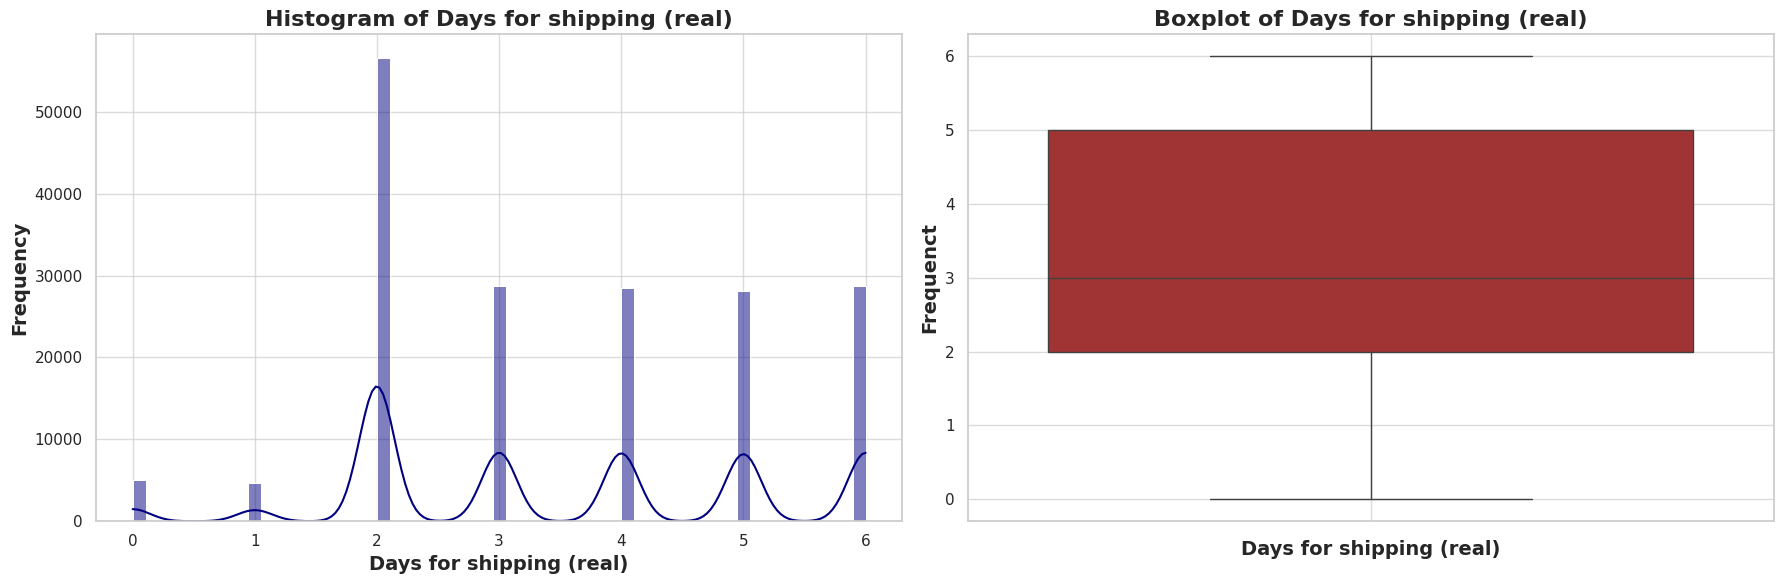

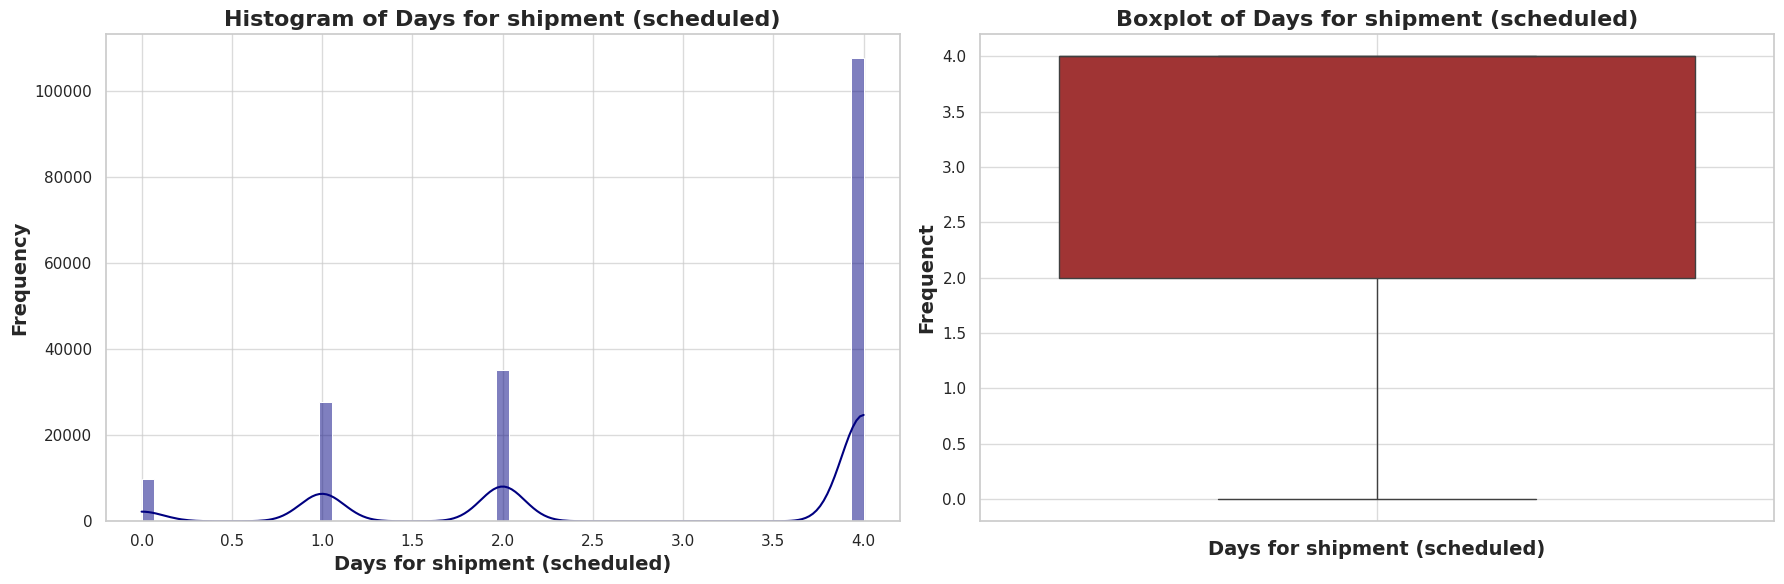

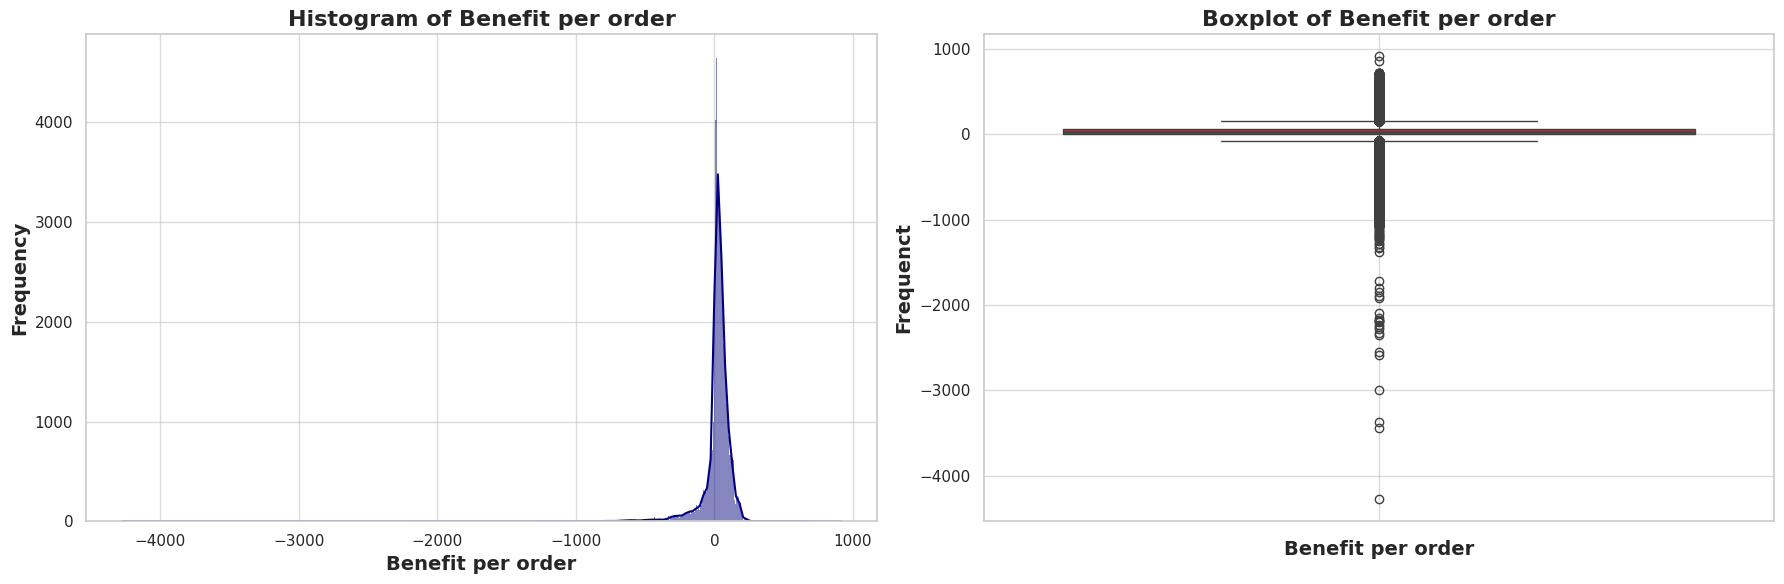

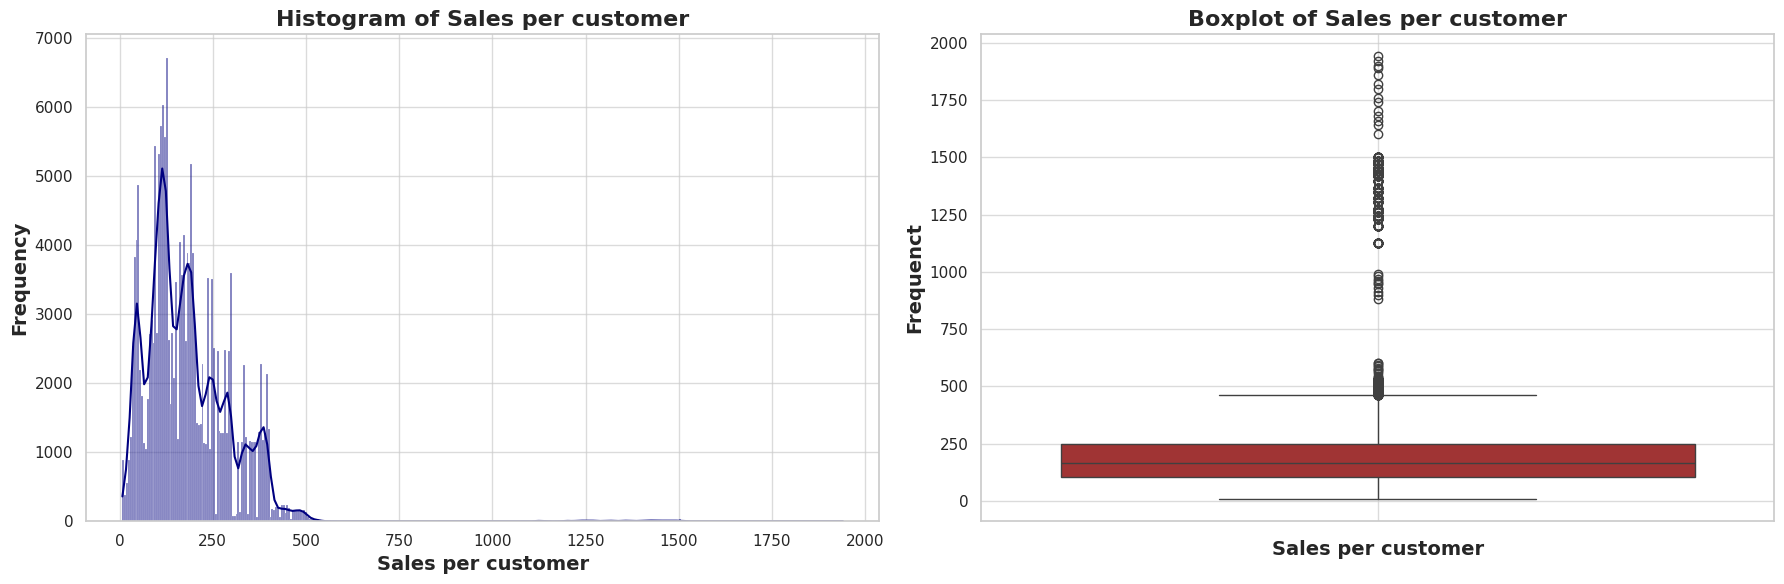

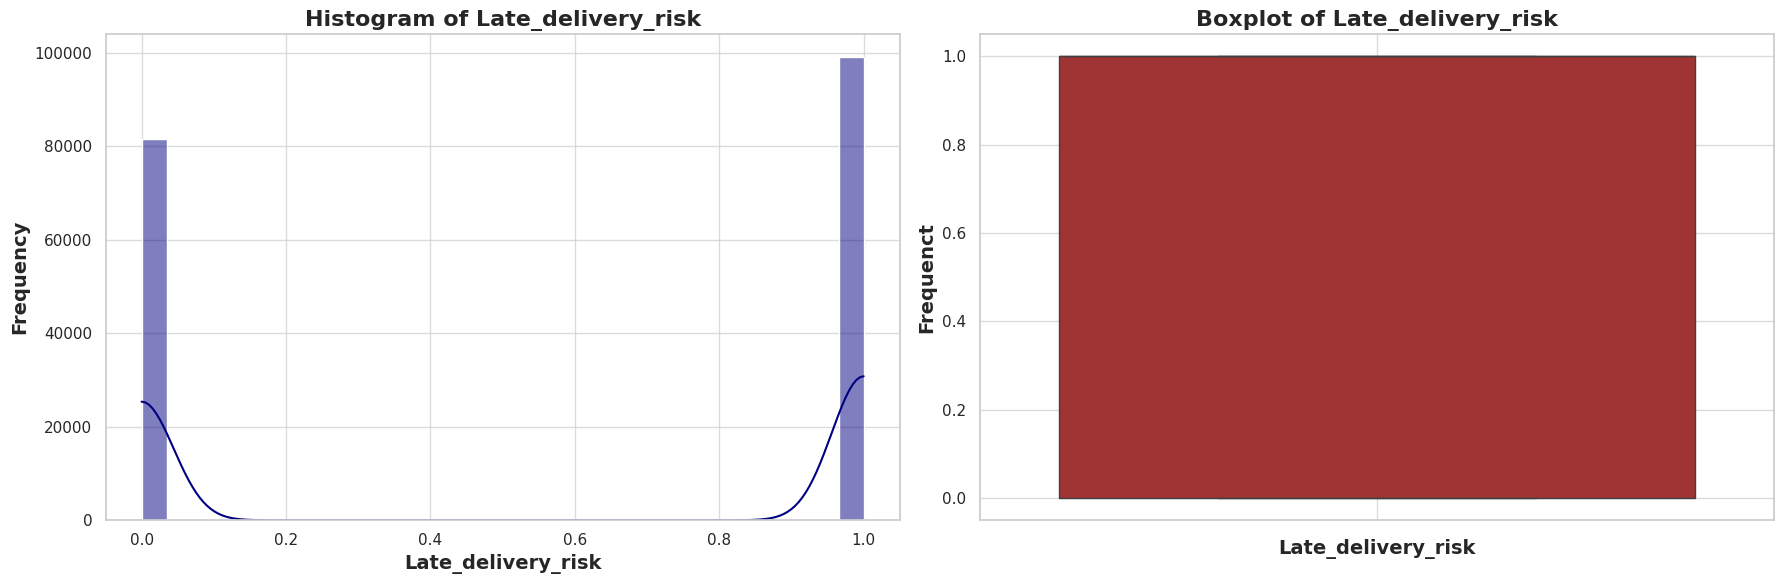

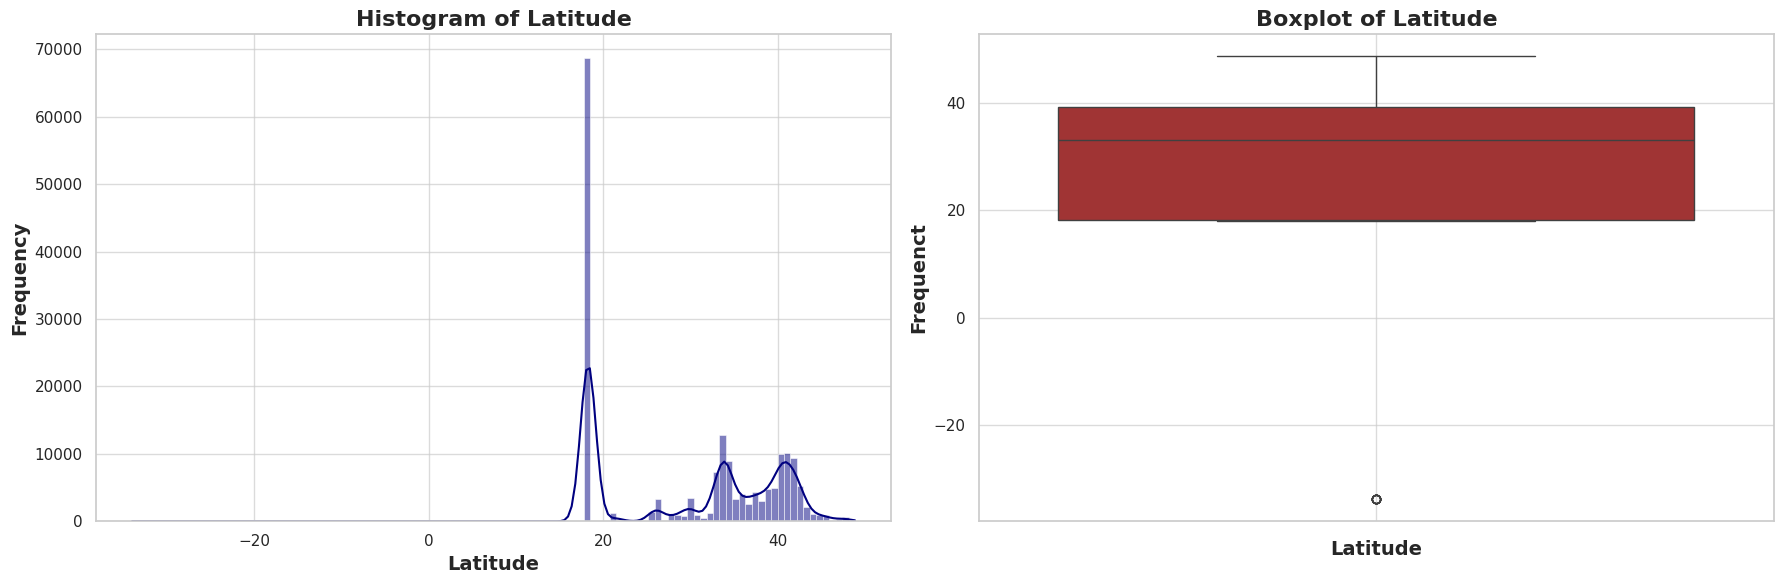

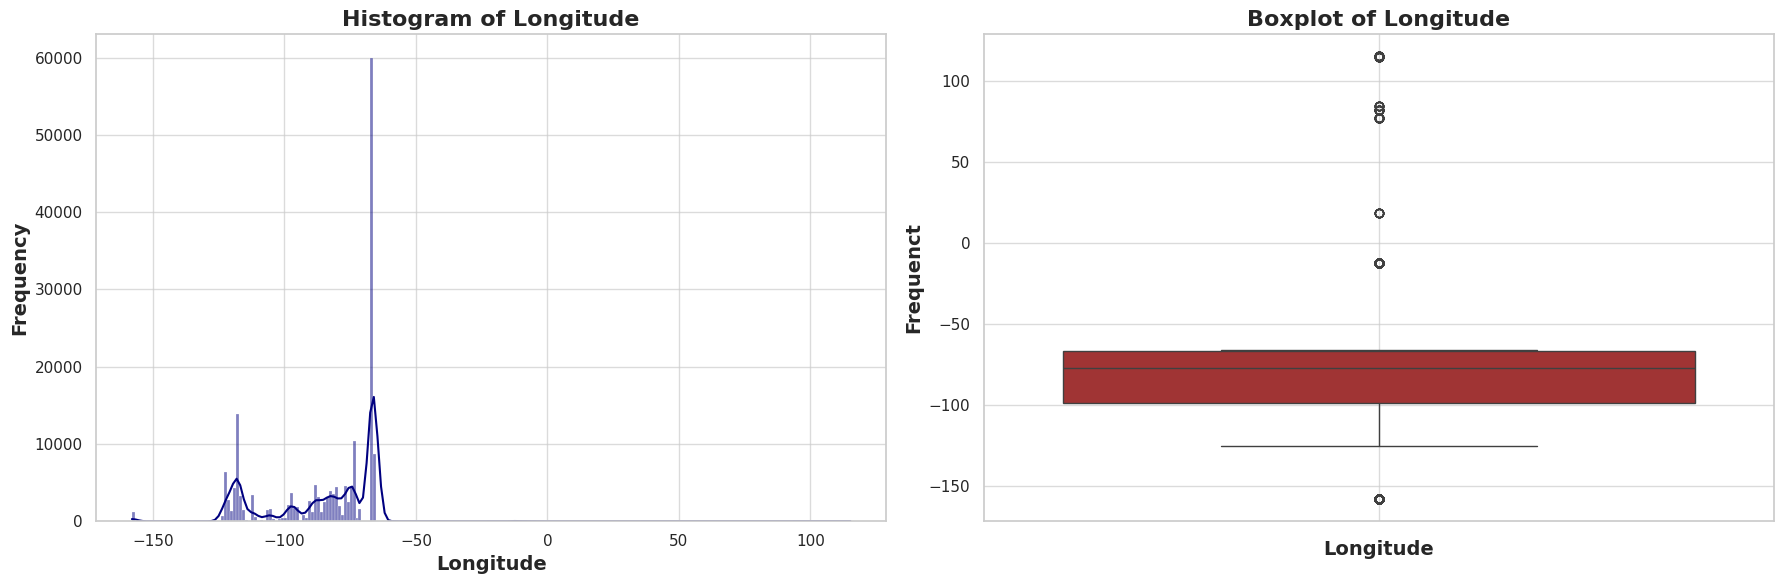

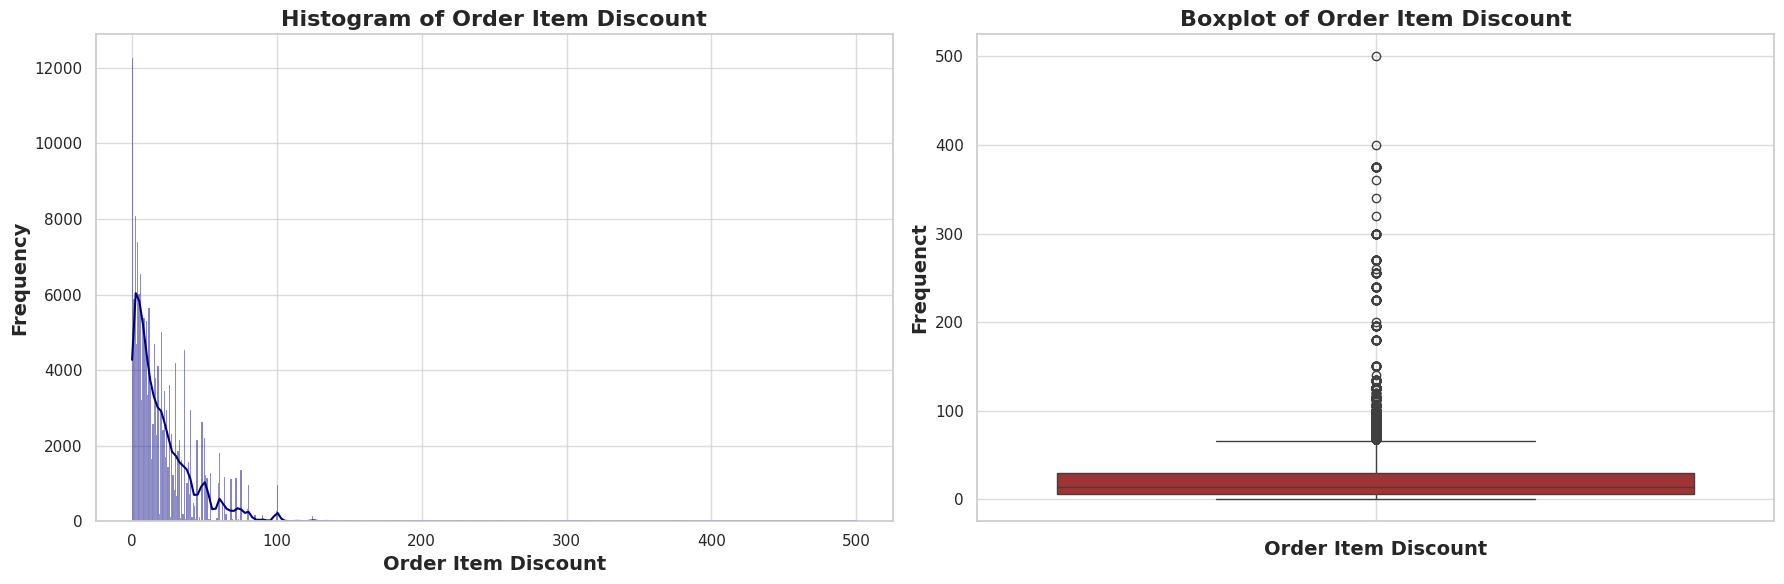

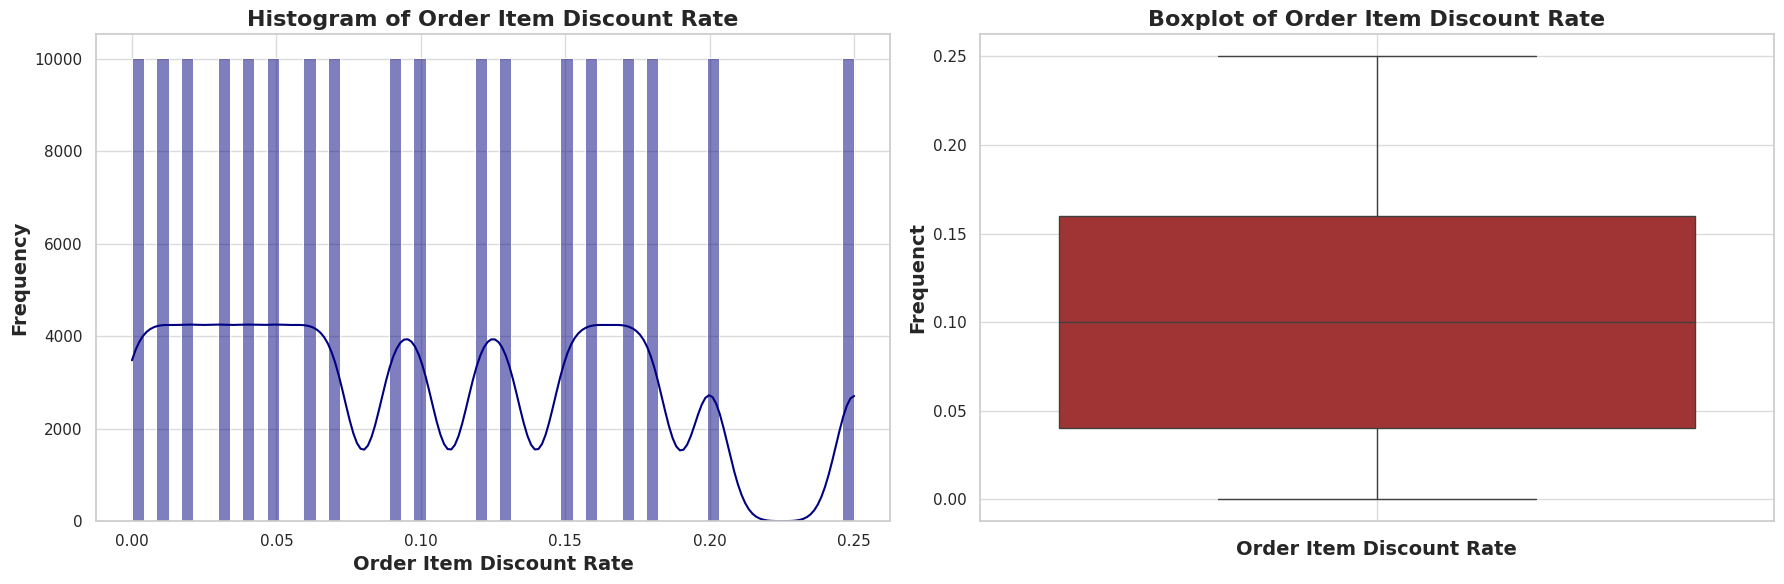

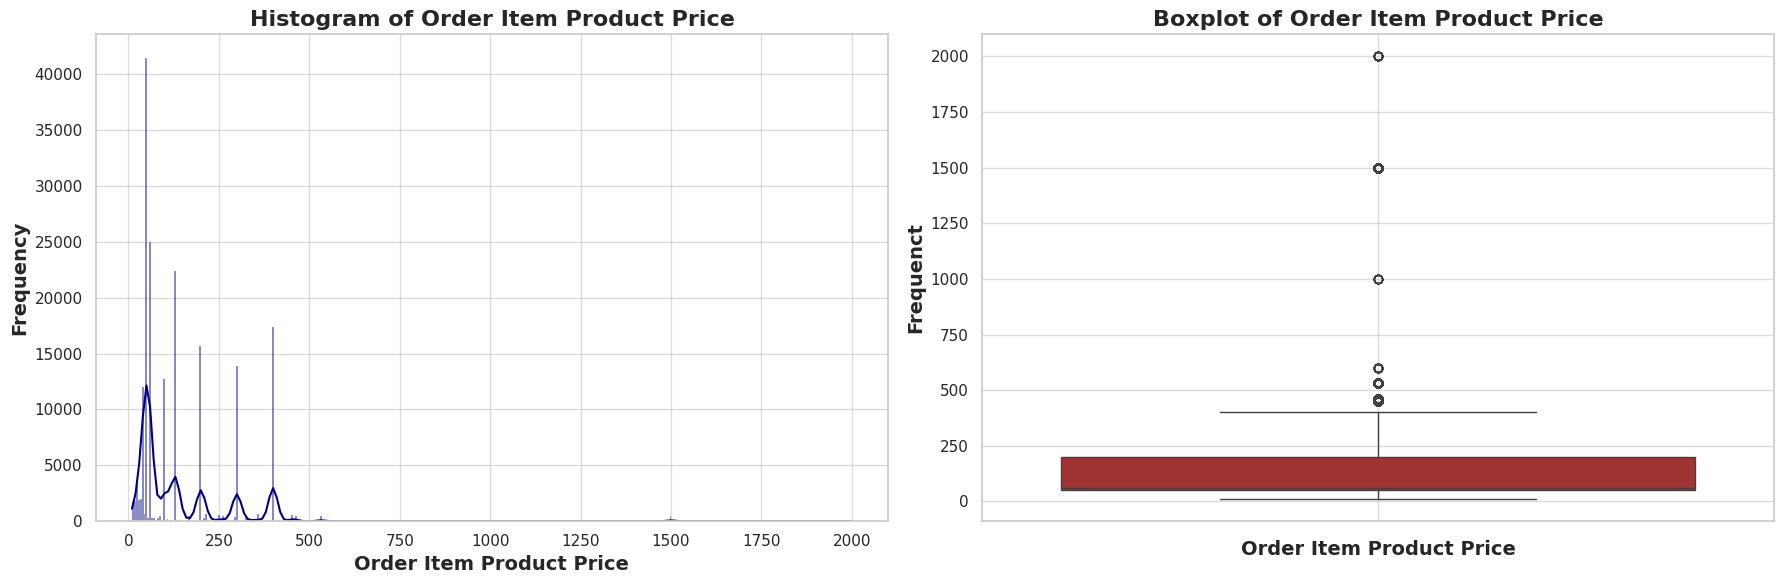

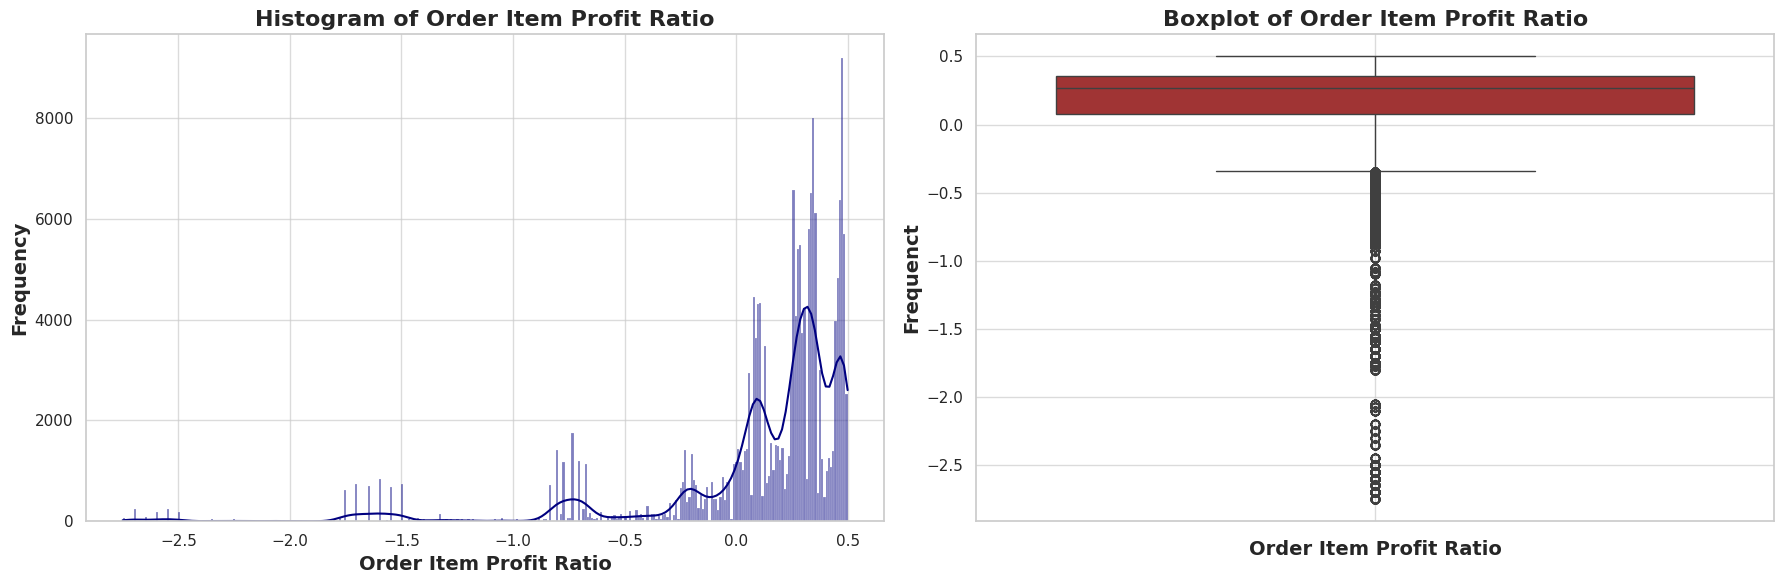

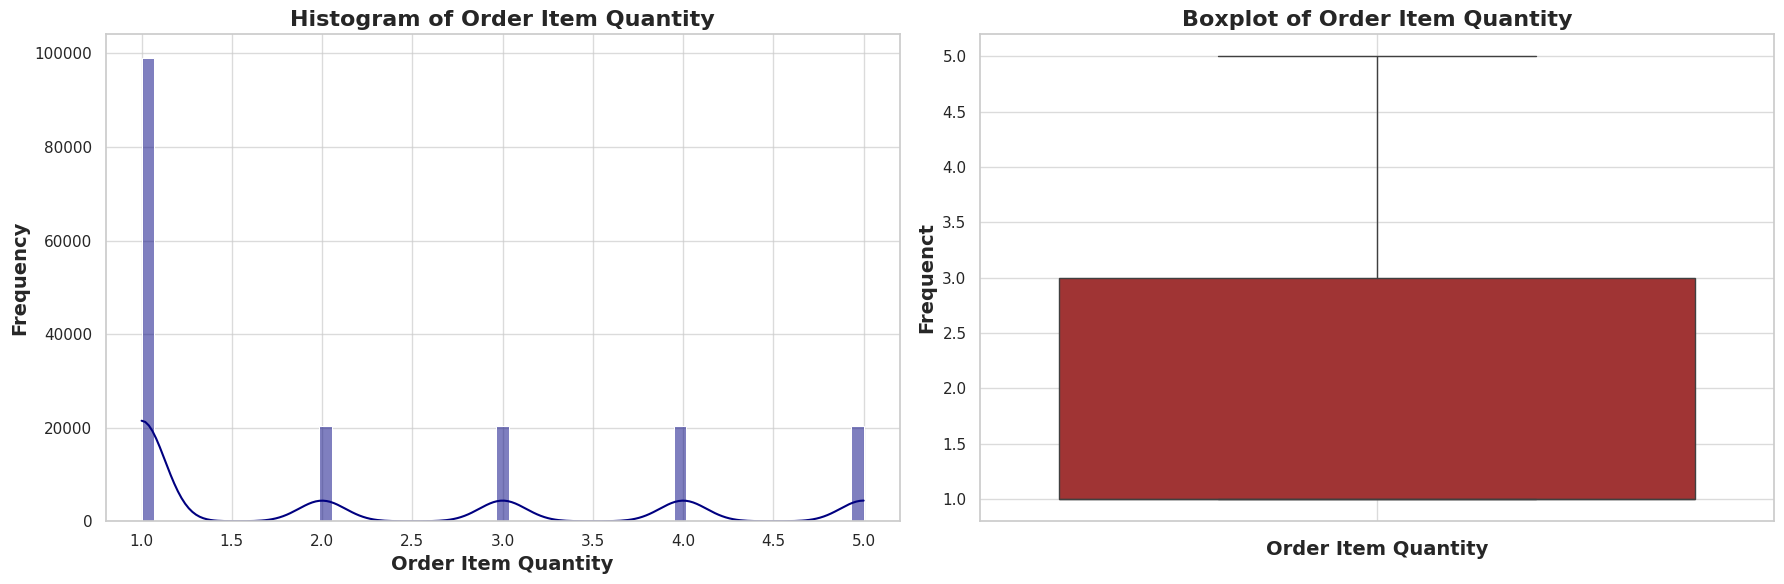

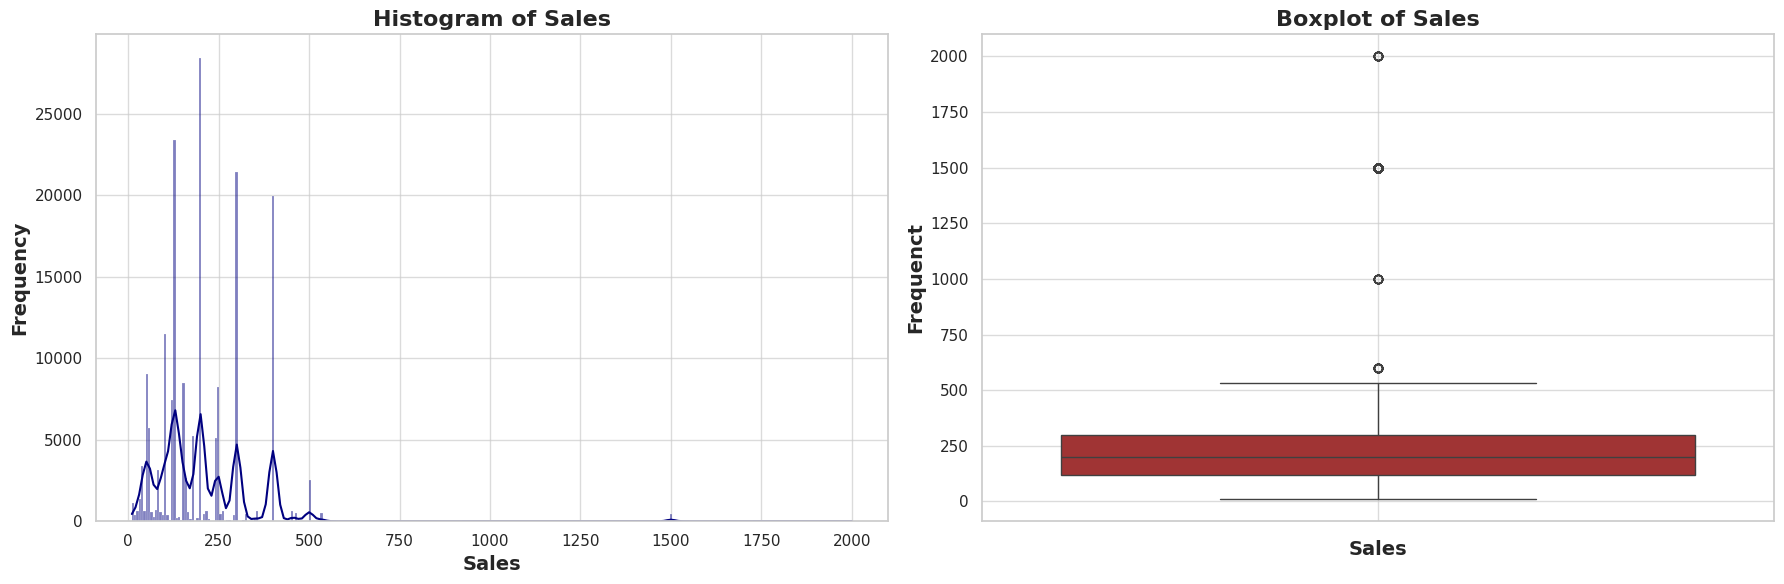

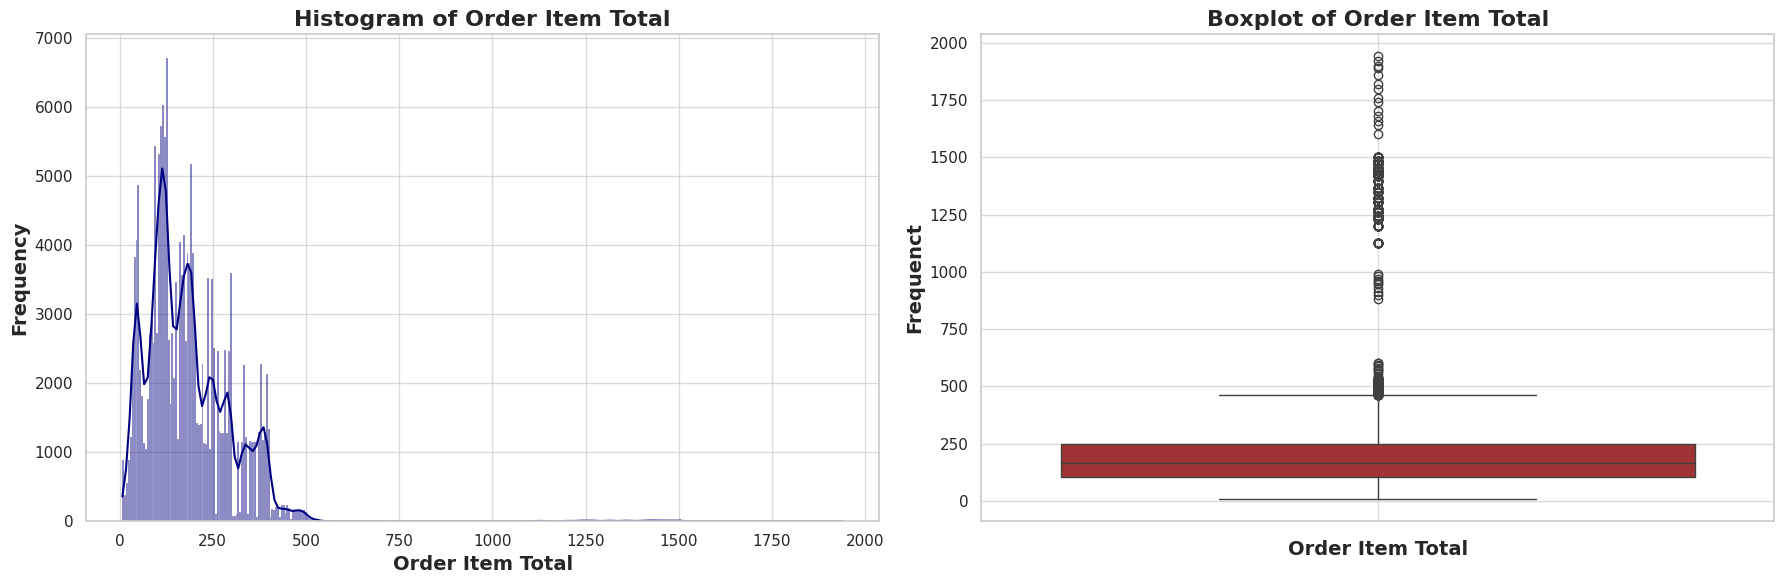

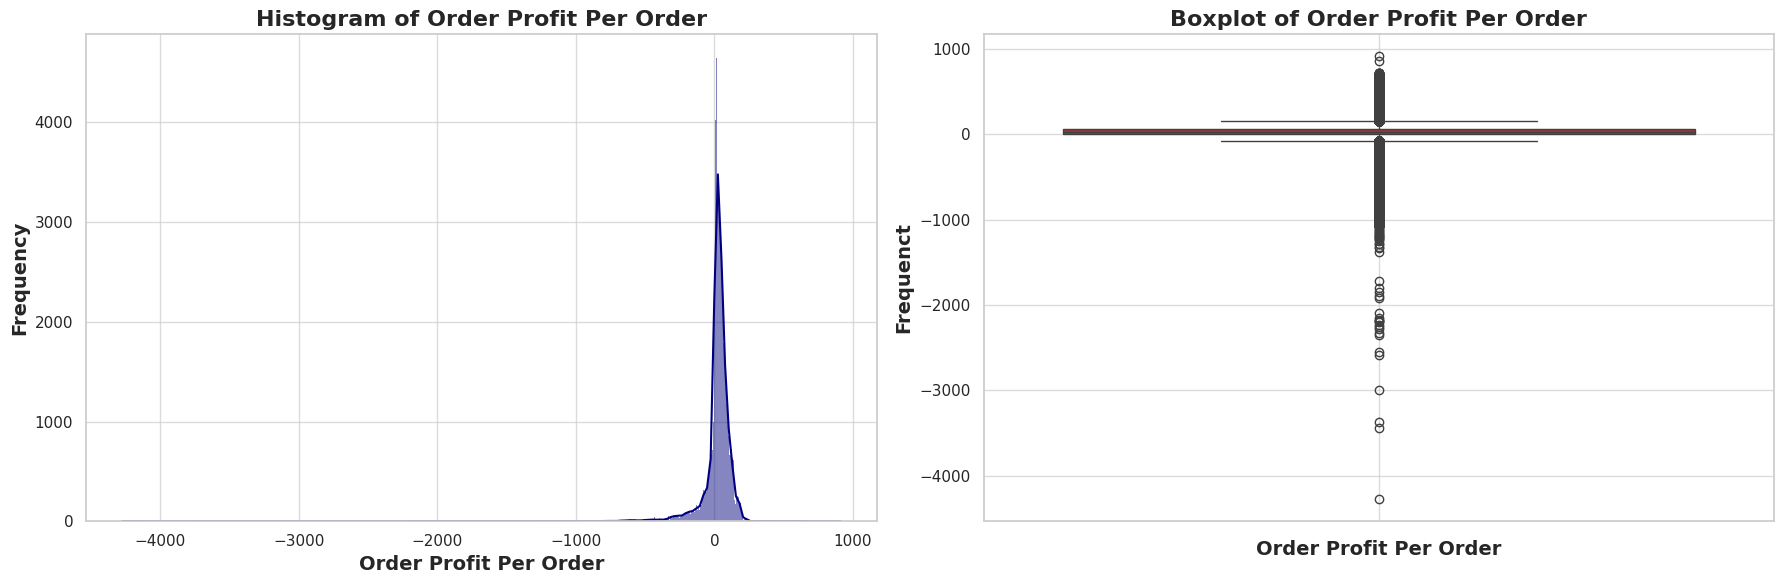

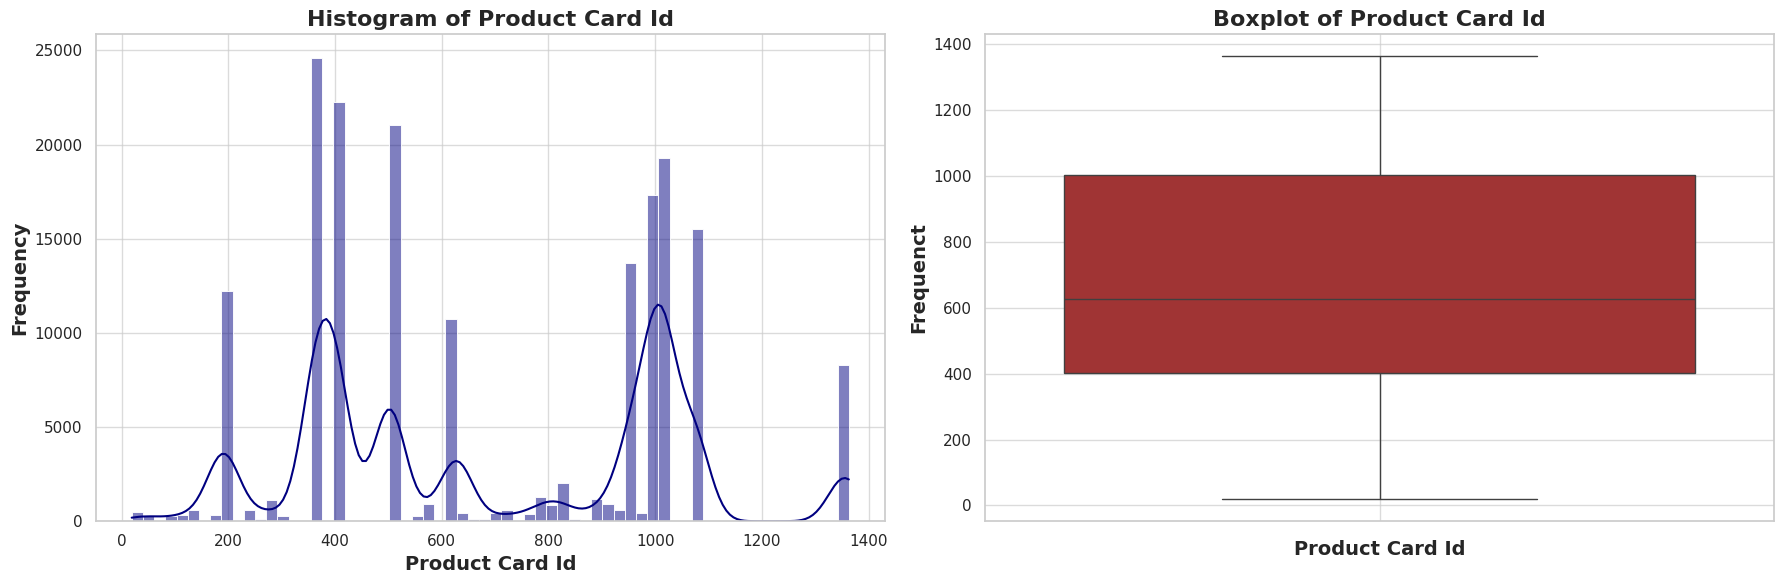

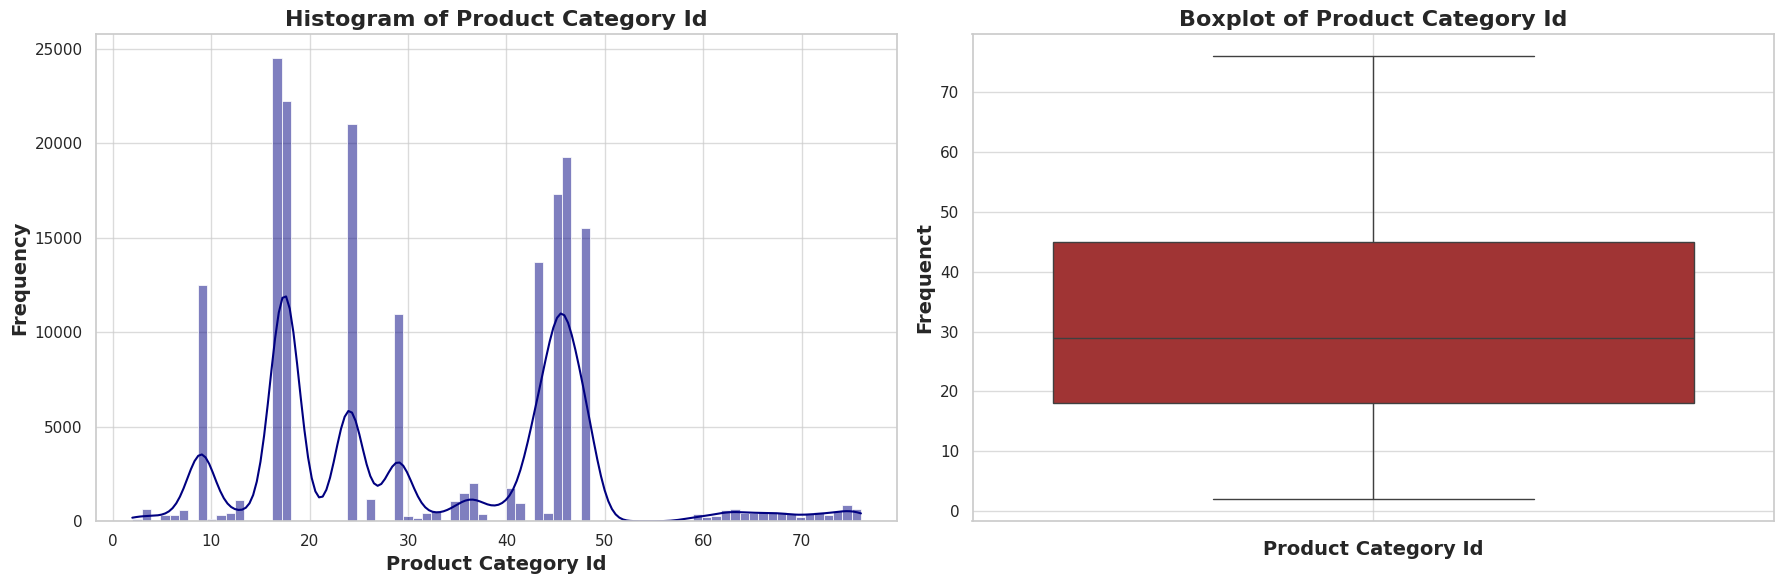

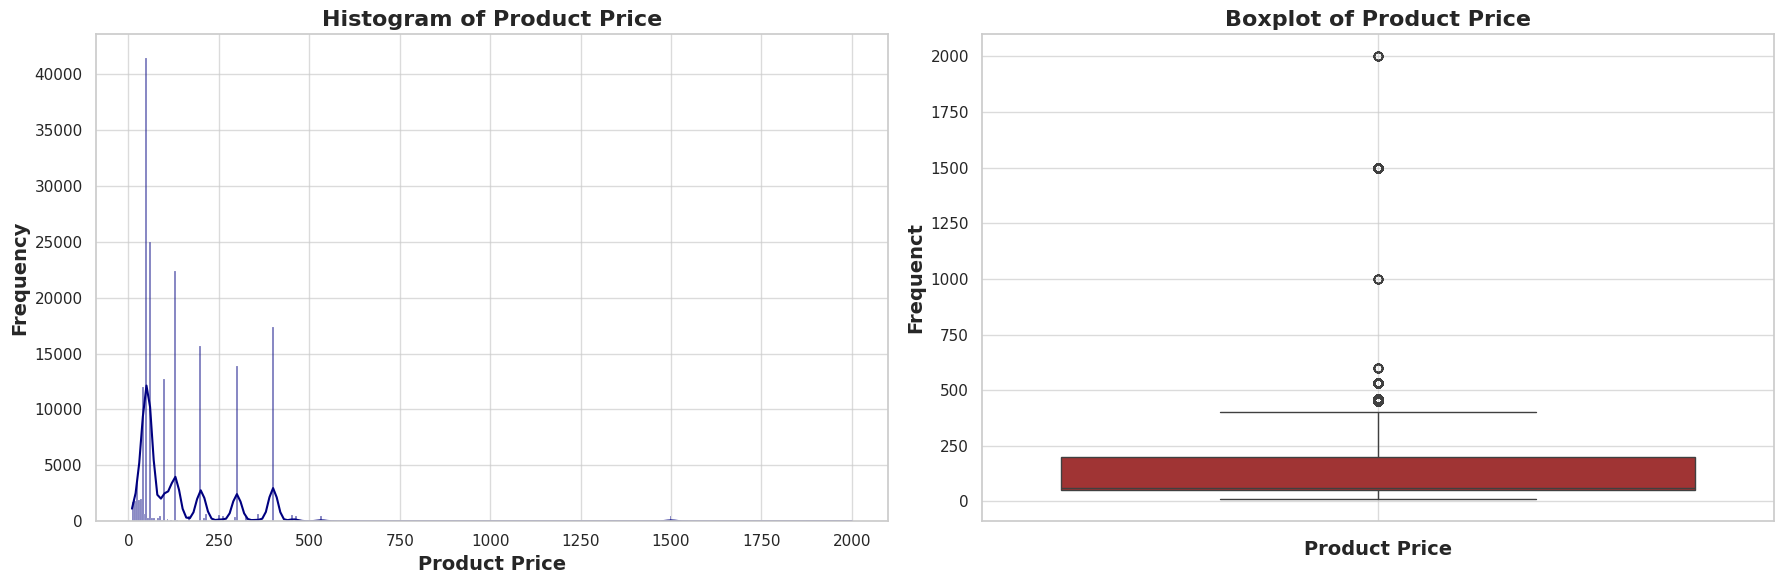

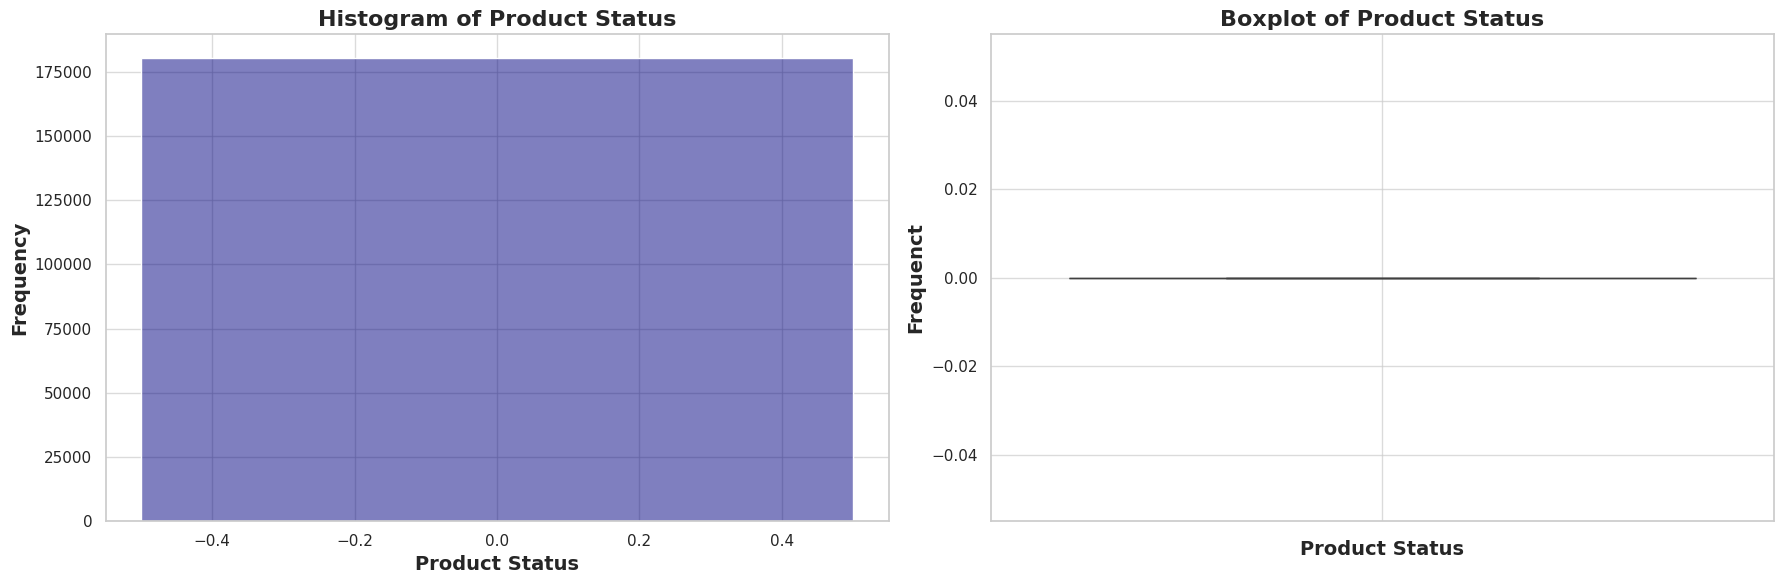

In [ ]:
distribution_data(df, numeric_cols)

**Insights :**
1. `Benefit per Order` : there were lots of outliers with losses ranging up to around 4,000 USD. Meanwhile only few outliers above upper limit (above around 70 USD) with profits reaching 1,000 USD
2. `Longitude` and `Latitude` : most purchases were likelt to be originated from a single store located around –60 to –70 longitude and 17–19 latitude
3. `Order Item Profit Ratio` : order item profit ratio revealed some negative ratio values of above -2.5% due to loss-making transactions. Despite having negative ratio, most of transactions have profit ratio of 0.3 - 0.5
4. `Order Item Quantity` and `Order Item Total` : most of transactions were made to order only one product in bulk quantities
5. `Sales` and `Sales per customer` : while sales indicate total sales before discount, sales per customer indicate total sales after discount. `Sales` column has few outliers above upper limit (500 USD) with majority of data lie around 150 - 200 USD. On the other hand, `Sales per customer` have more outliers with upper limit below 500 USD
6. `Order Item Discount` and `Order Item Discount Rate` : while there are no outliers in `Order Item Discount Rate`, there are some outliers in `Order Item Discount`

In [ ]:
# function for detecting outliers using IQR
def detect_outliers(df, col) :
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
  return outliers

In [ ]:
detect_outliers(df, 'Benefit per order')

Type  Days for shipping (real)  Days for shipment (scheduled)  \
1       TRANSFER                         5                              4   
2           CASH                         4                              4   
15         DEBIT                         2                              1   
16       PAYMENT                         5                              2   
20      TRANSFER                         0                              0   
...          ...                       ...                            ...   
180510   PAYMENT                         3                              4   
180511     DEBIT                         2                              2   
180515     DEBIT                         3                              2   
180517   PAYMENT                         3                              4   
180518   PAYMENT                         4                              4   

        Benefit per order  Sales per customer   Delivery Status  \
1             -249.089996          311.359985     Late delivery   
2             -247.779999          309.720001  Shipping on time   
15            -259.579987          324.470001     Late delivery   
16            -246.360001          321.200012     Late delivery   
20             154.860001          309.720001  Shipping on time   
...                   ...                 ...               ...   
180510         165.990005          331.980011  Advance shipping   
180511         157.429993          327.980011  Shipping on time   
180515        -613.770019          395.980011     Late delivery   
180517         186.229996          387.980011  Advance shipping   
180518         168.949997          383.980011  Shipping on time   

        Late_delivery_risk  Category Id   Category Name Customer City  \
1                        1           73  Sporting Goods        Caguas   
2                        0           73  Sporting Goods      San Jose   
15                       1           73  Sporting Goods        Caguas   
16                       1           73  Sporting Goods     Canovanas   
20                       0           73  Sporting Goods    Long Beach   
...                    ...          ...             ...           ...   
180510                   0           45         Fishing        Caguas   
180511                   0           45         Fishing   Chula Vista   
180515                   1           45         Fishing   Bakersfield   
180517                   0           45         Fishing        Caguas   
180518                   0           45         Fishing        Caguas   

       Customer Country Customer Email Customer Fname  Customer Id  \
1           Puerto Rico      XXXXXXXXX          Irene        19492   
2               EE. UU.      XXXXXXXXX        Gillian        19491   
15          Puerto Rico      XXXXXXXXX           Sade        19478   
16          Puerto Rico      XXXXXXXXX         Brynne        19477   
20              EE. UU.      XXXXXXXXX         Kellie        19473   
...                 ...            ...            ...          ...   
180510      Puerto Rico      XXXXXXXXX        Melissa            7   
180511          EE. UU.      XXXXXXXXX         Olivia         9314   
180515          EE. UU.      XXXXXXXXX         Ronald         9141   
180517      Puerto Rico      XXXXXXXXX           Mary         2813   
180518      Puerto Rico      XXXXXXXXX         Andrea         7547   

       Customer Lname Customer Password Customer Segment Customer State  \
1                Luna         XXXXXXXXX         Consumer             PR   
2           Maldonado         XXXXXXXXX         Consumer             CA   
15          Lancaster         XXXXXXXXX        Corporate             PR   
16              Giles         XXXXXXXXX        Corporate             PR   
20             Farmer         XXXXXXXXX        Corporate             CA   
...               ...               ...              ...            ...   
180510         Wilcox         XXXXXXXXX

In [ ]:
detect_outliers(df, 'Order Profit Per Order')

Type  Days for shipping (real)  Days for shipment (scheduled)  \
1       TRANSFER                         5                              4   
2           CASH                         4                              4   
15         DEBIT                         2                              1   
16       PAYMENT                         5                              2   
20      TRANSFER                         0                              0   
...          ...                       ...                            ...   
180510   PAYMENT                         3                              4   
180511     DEBIT                         2                              2   
180515     DEBIT                         3                              2   
180517   PAYMENT                         3                              4   
180518   PAYMENT                         4                              4   

        Benefit per order  Sales per customer   Delivery Status  \
1             -249.089996          311.359985     Late delivery   
2             -247.779999          309.720001  Shipping on time   
15            -259.579987          324.470001     Late delivery   
16            -246.360001          321.200012     Late delivery   
20             154.860001          309.720001  Shipping on time   
...                   ...                 ...               ...   
180510         165.990005          331.980011  Advance shipping   
180511         157.429993          327.980011  Shipping on time   
180515        -613.770019          395.980011     Late delivery   
180517         186.229996          387.980011  Advance shipping   
180518         168.949997          383.980011  Shipping on time   

        Late_delivery_risk  Category Id   Category Name Customer City  \
1                        1           73  Sporting Goods        Caguas   
2                        0           73  Sporting Goods      San Jose   
15                       1           73  Sporting Goods        Caguas   
16                       1           73  Sporting Goods     Canovanas   
20                       0           73  Sporting Goods    Long Beach   
...                    ...          ...             ...           ...   
180510                   0           45         Fishing        Caguas   
180511                   0           45         Fishing   Chula Vista   
180515                   1           45         Fishing   Bakersfield   
180517                   0           45         Fishing        Caguas   
180518                   0           45         Fishing        Caguas   

       Customer Country Customer Email Customer Fname  Customer Id  \
1           Puerto Rico      XXXXXXXXX          Irene        19492   
2               EE. UU.      XXXXXXXXX        Gillian        19491   
15          Puerto Rico      XXXXXXXXX           Sade        19478   
16          Puerto Rico      XXXXXXXXX         Brynne        19477   
20              EE. UU.      XXXXXXXXX         Kellie        19473   
...                 ...            ...            ...          ...   
180510      Puerto Rico      XXXXXXXXX        Melissa            7   
180511          EE. UU.      XXXXXXXXX         Olivia         9314   
180515          EE. UU.      XXXXXXXXX         Ronald         9141   
180517      Puerto Rico      XXXXXXXXX           Mary         2813   
180518      Puerto Rico      XXXXXXXXX         Andrea         7547   

       Customer Lname Customer Password Customer Segment Customer State  \
1                Luna         XXXXXXXXX         Consumer             PR   
2           Maldonado         XXXXXXXXX         Consumer             CA   
15          Lancaster         XXXXXXXXX        Corporate             PR   
16              Giles         XXXXXXXXX        Corporate             PR   
20             Farmer         XXXXXXXXX        Corporate             CA   
...               ...               ...              ...            ...   
180510         Wilcox         XXXXXXXXX

**Insight :** All the outliers make sense, so these outliers will be kept as it is

# **FEATURE ENGINEERING**

## **Temporal Features**

In [ ]:
# extract month from shipping date
df['shipping_month'] = df['shipping date (DateOrders)'].dt.month

month_map = {
    1 : 'Jan',
    2 : 'Feb',
    3 : 'Mar',
    4 : 'Apr',
    5 : 'May',
    6 : 'Jun',
    7 : 'Jul',
    8 : 'Aug',
    9 : 'Sep',
    10 : 'Oct',
    11 : 'Nov',
    12 : 'Dec'
}

df['shipping_month'] = df['shipping_month'].replace(month_map)

# order from January to December
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
df['shipping_month'] = pd.Categorical(df['shipping_month'], ordered=True, categories = month_order)


In [ ]:
# add column "DayofWeek"
df['shipping_DayofWeek'] = df['shipping date (DateOrders)'].dt.dayofweek

# change day name
day_map = {
    0 : 'Monday',
    1 : 'Tuesday',
    2 : 'Wednesday',
    3 : 'Thursday',
    4 : 'Friday',
    5 : 'Saturday',
    6 : 'Sunday'
}
df['shipping_DayofWeek'] = df['shipping_DayofWeek'].replace(day_map)

# order from Monday to Sunday
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['shipping_DayofWeek'] = pd.Categorical(df['shipping_DayofWeek'], ordered=True, categories = day_order)

In [ ]:
# Add column "Hour"
df['shipping_Hour'] = df['shipping date (DateOrders)'].dt.hour

# categorize column "Hour" into morning, afternoon, and evening
def categorize_time(hour):
    if 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    else:
        return 'Evening'

# apply function to column "Hour"
df['shipping_TimeCategory'] = df['shipping_Hour'].apply(categorize_time)

In [ ]:
# calculate the difference in shipping (real) and shipping (expected)
df['shipping_day_deviation'] =  df['Days for shipping (real)'] - df['Days for shipment (scheduled)']

## **Gepspatial Features**

In [ ]:
# assign store ID based on longitude and latitude
unique_stores = df[['Latitude','Longitude']].drop_duplicates().reset_index(drop=True)

# assign ID Store
unique_stores['Store_ID'] = range(1, len(unique_stores) + 1)

# merge with the original dataframe
df = df.merge(unique_stores, on=['Latitude','Longitude'], how='left')

In [ ]:
df.shape

(180519, 56)

# **EXPLORATORY DATA ANALYSIS**

Exploratory Data Analysis will be focused on inventory management and logistics topics. In the following sections, EDA will be categorized into several sub-topics as follows :
1. Logistics Performance
2. Supply Chain Efficiency
3. Inventory Management

## **Univariate Analysis**

### **Categorical Columns**

In [ ]:
categorical_cols = [col for col in df.select_dtypes(['object', 'category']).columns]
categorical_cols

['Type',
 'Delivery Status',
 'Category Name',
 'Customer City',
 'Customer Country',
 'Customer Email',
 'Customer Fname',
 'Customer Lname',
 'Customer Password',
 'Customer Segment',
 'Customer State',
 'Customer Street',
 'Department Name',
 'Market',
 'Order City',
 'Order Country',
 'Order Region',
 'Order State',
 'Order Status',
 'Product Image',
 'Product Name',
 'Shipping Mode',
 'shipping_month',
 'shipping_DayofWeek',
 'shipping_TimeCategory']

In [ ]:
# exclude some columns
excluded_cat_cols = ['Customer Email', 'Customer Fname', 'Customer Lname', 'Customer Password',
                     'Customer Street', 'Product Image', 'Category Name', 'Product Name', 'Order State',
                     'Customer State', 'Customer City', 'Order City', 'Order Country', 'Order Country_en',
                     'Order State_en', 'Order City_en']
categorical_cols = [col for col in categorical_cols if not col in excluded_cat_cols]

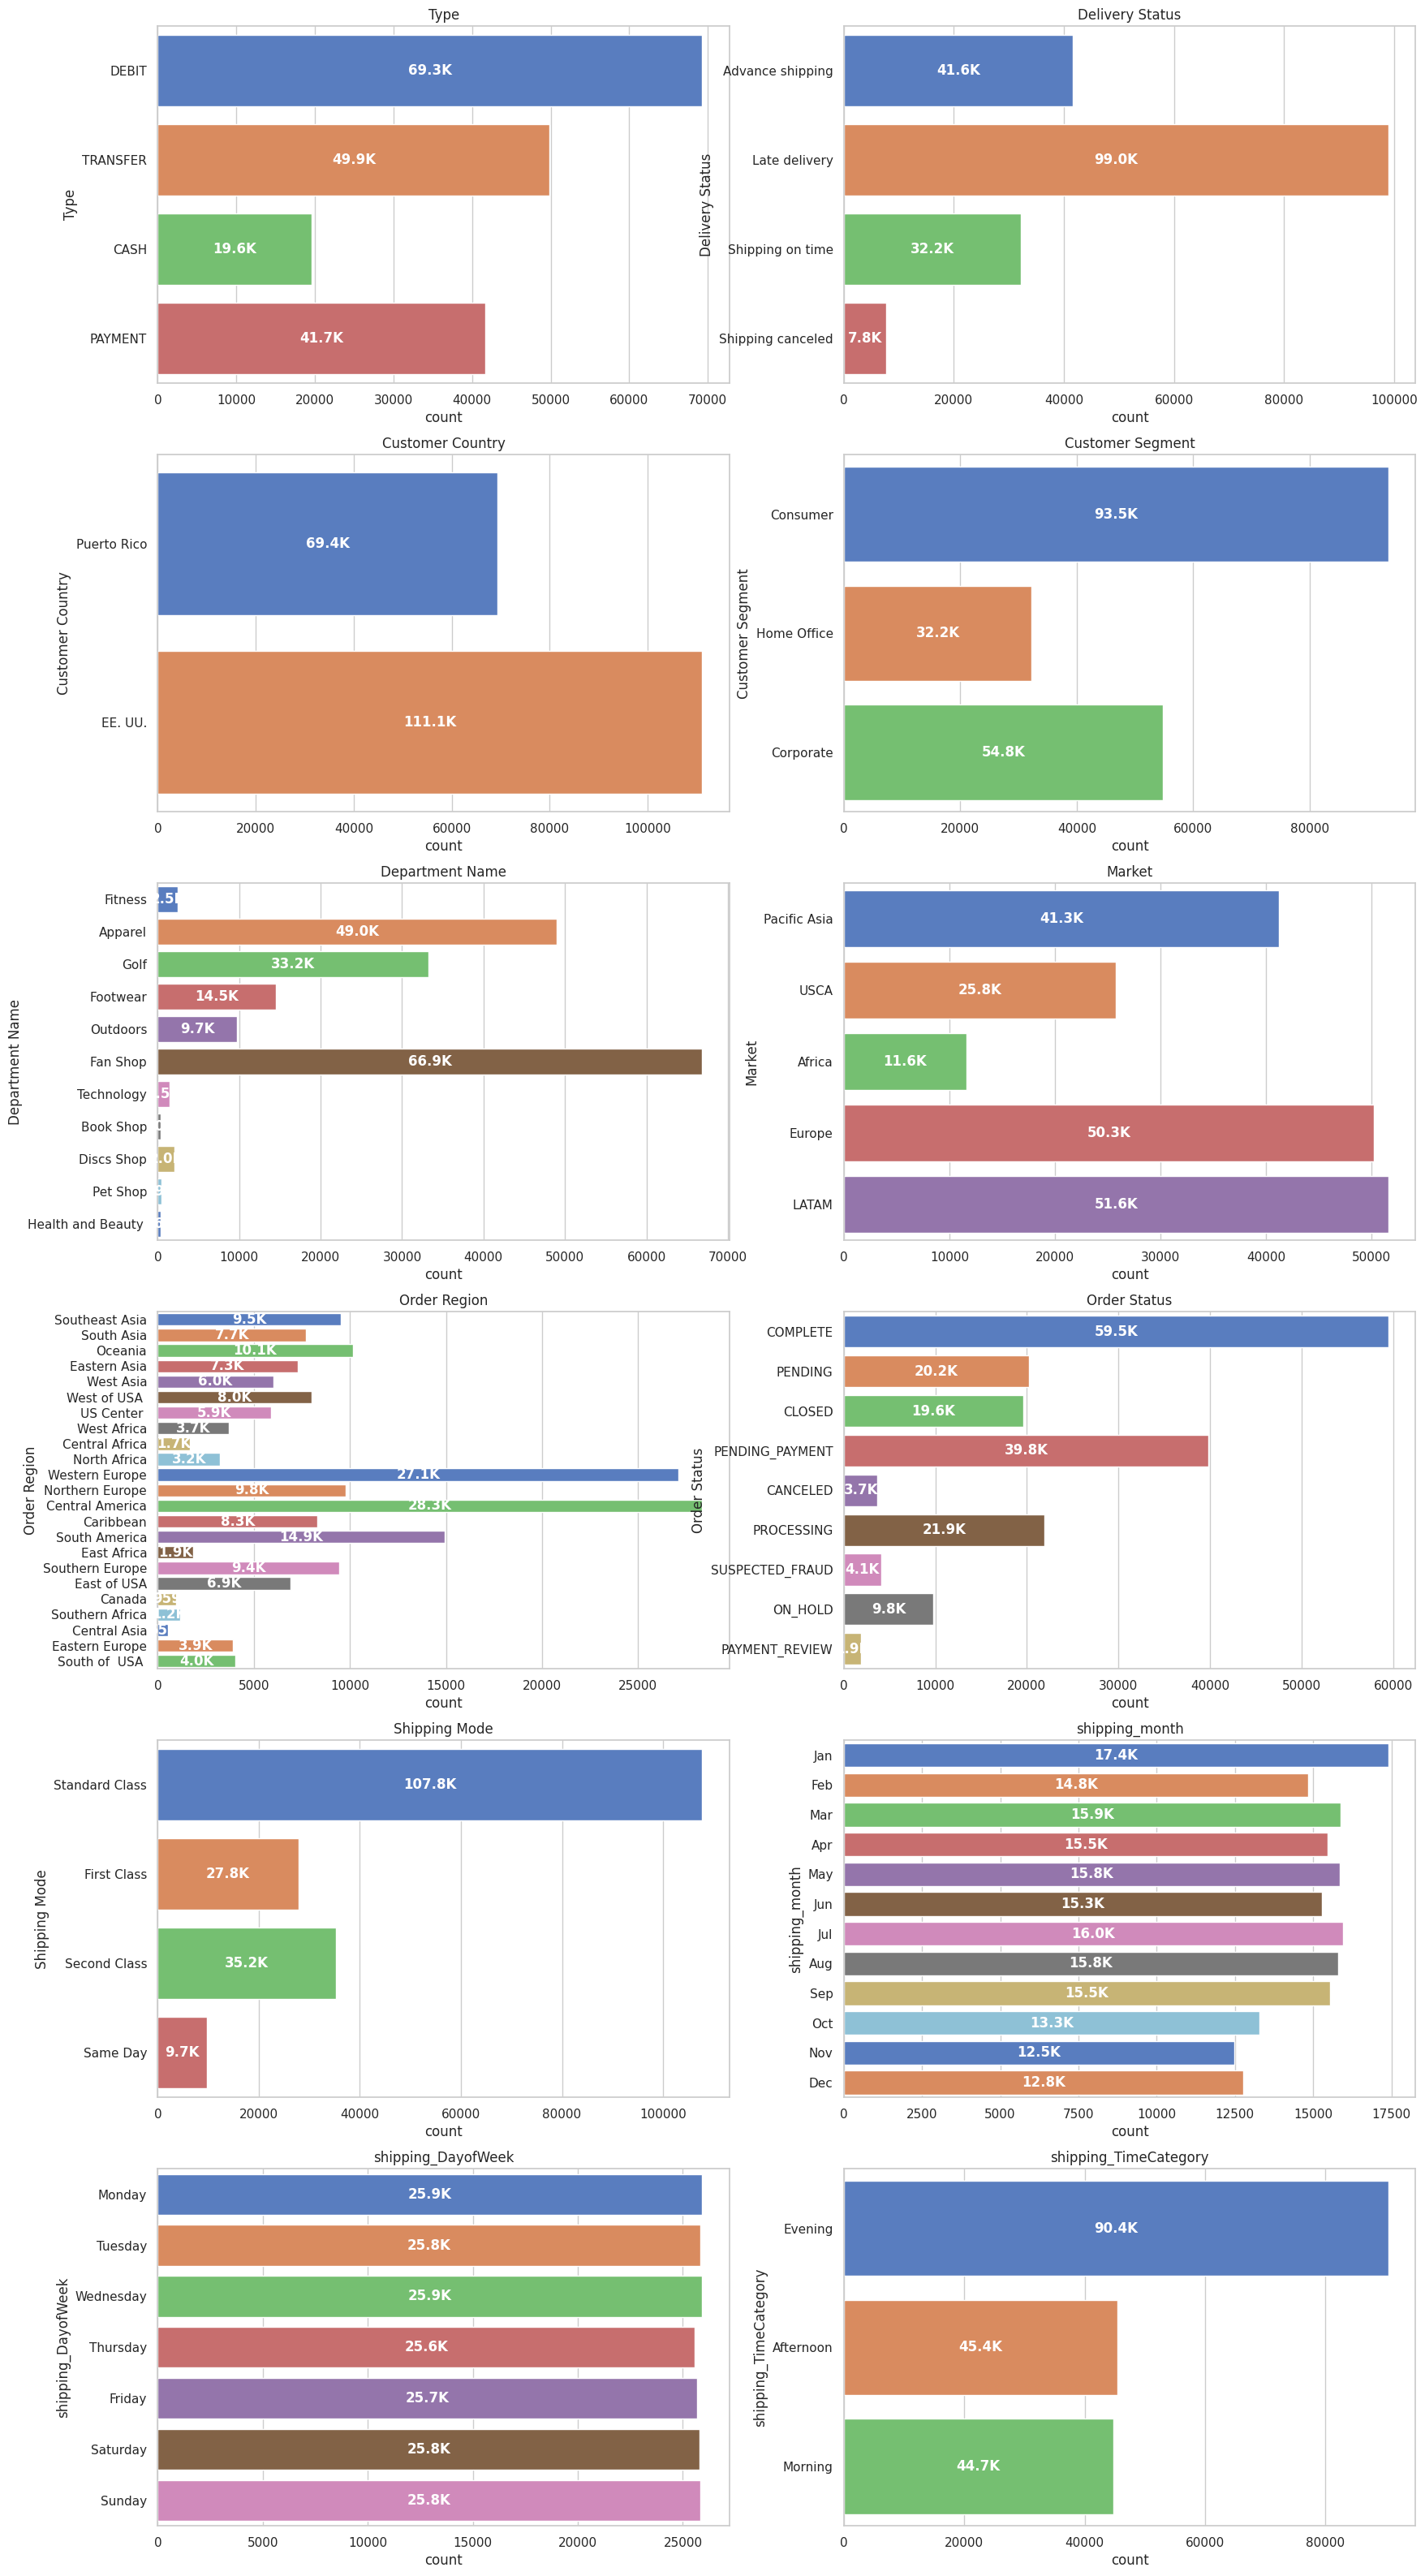

In [ ]:
# determine number of columns and rows for subplots
n_cols = 2
n_rows = (len(categorical_cols) + n_cols - 1)// n_cols

# create a figure and axes
fig, axes = plt.subplots(n_rows, n_cols, figsize = (20,40))

for i, ax in enumerate(axes.flat) :
  if i < len(categorical_cols) :
    col = categorical_cols[i]
    a = sns.countplot(y=df[col], ax= ax, hue = df[col], palette = 'muted')
    a.set(title = col)

    # add data label
    for p in ax.patches :
      count = int(p.get_width()) #take the frequency of data
      # to make it easier and simpler to see, make the label format from thousands (1000) to be 1K
      if count >= 1000 :
        label = f'{count/1000:.1f}K'
      else :
        label = str(count)

      # add label
      ax.text(p.get_width()/2, # horizontal position
              p.get_y() + p.get_height()/2, # vertical position
              label,
              va = 'center', ha= 'center', #the label will be located in the center
              color = 'white',
              weight = 'bold')
  else :
    ax.set_visible(False) # if there's no data anymore, there will not be axis

plt.show()

**Insights :**
1. `Type` : lots of transactions were paid using debit. Pending payment represented by value "Payment" had comparable values as "Transfer", indicating that there was moderate proportion of pending transaction
2. `Delivery Status` : late delivery dominated dataset with small proportion of cancelled shipping
3. `Customer Segment` : majority of customers were individual consumers which indicate that the company was more focused on B2C market
4. `Department Name` : fan shop and apparel became the most popular categories
5. `Market` : majority of orders were sent to countries in Europe and Latin America. Only very small proportion of purchased products were sent to Africa
6. `Order Region` : specifically, Western Europe and Central America became the core markets with the most orders
6. `Order Status` : although most of orders were labelled as "Completed", "Pending_Payment" had large proportion
7.  `Shipping Mode` : majority of customers prefer standard class over other shipping options
8. `shipping_month` : January until September had large number of shipped orders with the highest number of shipped orders in January
9. `shipping_DayOfWeek` : shipping was done everyday with the similar number of orders
10. `shipping_TimeCategory` : majority of orders were shipped on evening

## **Delivery Performance Analysis**

### **Late Delivery Risk**

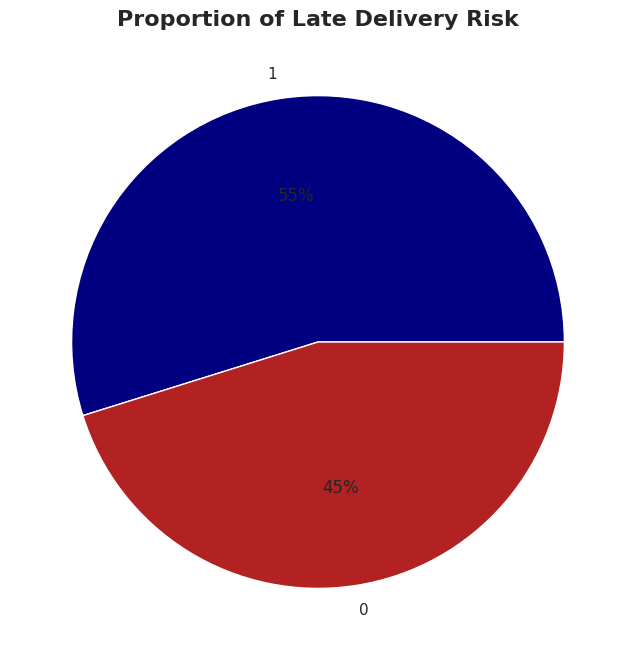

In [ ]:
# proportion of late delivery
df_late = df['Late_delivery_risk'].value_counts().reset_index()
df_late.columns = ['Late_delivery_risk', 'Count']

custom_colors = ['navy', 'firebrick']
plt.figure(figsize=(12,8))
plt.pie(df_late['Count'], labels =df_late['Late_delivery_risk'], colors=custom_colors, autopct='%.0f%%')
plt.title('Proportion of Late Delivery Risk', fontsize=16, fontweight='bold')
plt.show()

**Insight :** late and on-time delivery is quite balanced with the proportion of late delivery reaching 55% and on-time delivery reaching 45%




### **On-time Rate by Shipping Mode**

In [ ]:
# function to aggregate data and calculate on-time rate
def on_time_rate(df, col) :
  df_late = df.groupby(col)['Late_delivery_risk'].value_counts().unstack().reset_index()
  df_late.columns = [col, 'On Time', 'Late']
  df_late['On Time Rate'] = df_late['On Time'] / (df_late['On Time'] + df_late['Late']) * 100
  return df_late

In [ ]:
# On-time rate based on shipping mode
df_late_shipping = on_time_rate(df, 'Shipping Mode')

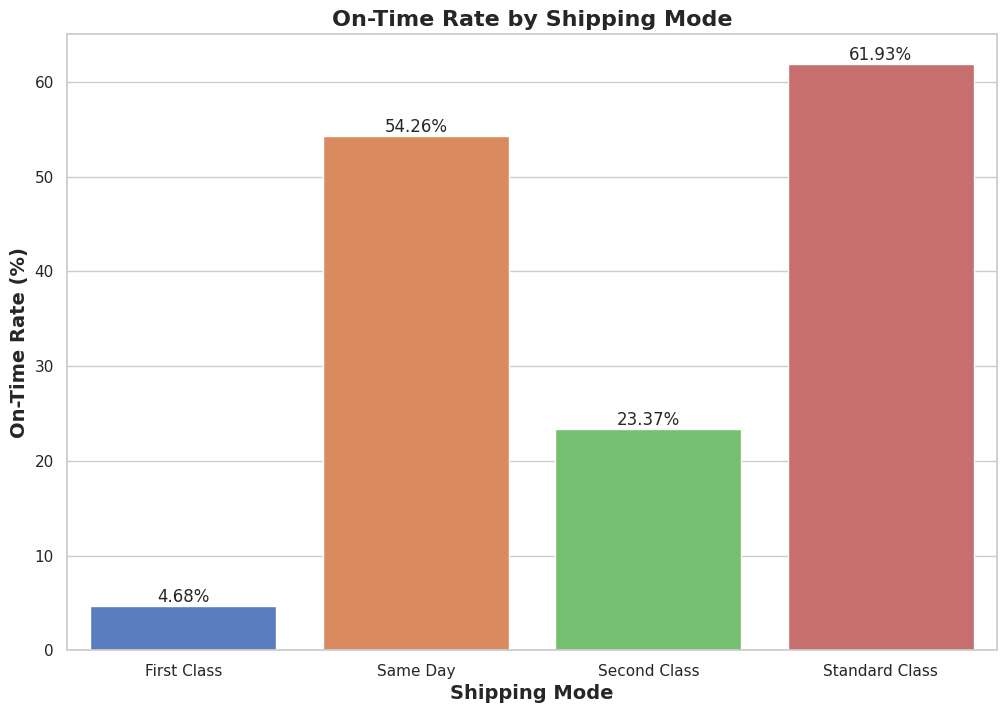

In [ ]:
# visualize data
plt.figure(figsize=(12,8))
sns.barplot(x='Shipping Mode', y='On Time Rate', data=df_late_shipping, palette='muted')
plt.title('On-Time Rate by Shipping Mode', fontsize=16, fontweight='bold')
plt.xlabel('Shipping Mode', fontsize=14, fontweight='bold')
plt.ylabel('On-Time Rate (%)', fontsize=14, fontweight='bold')

# add text in bar chart
for i, v in enumerate(df_late_shipping['On Time Rate']):
  plt.text(i, v, f'{v:.2f}%', ha='center', va='bottom')
plt.show()

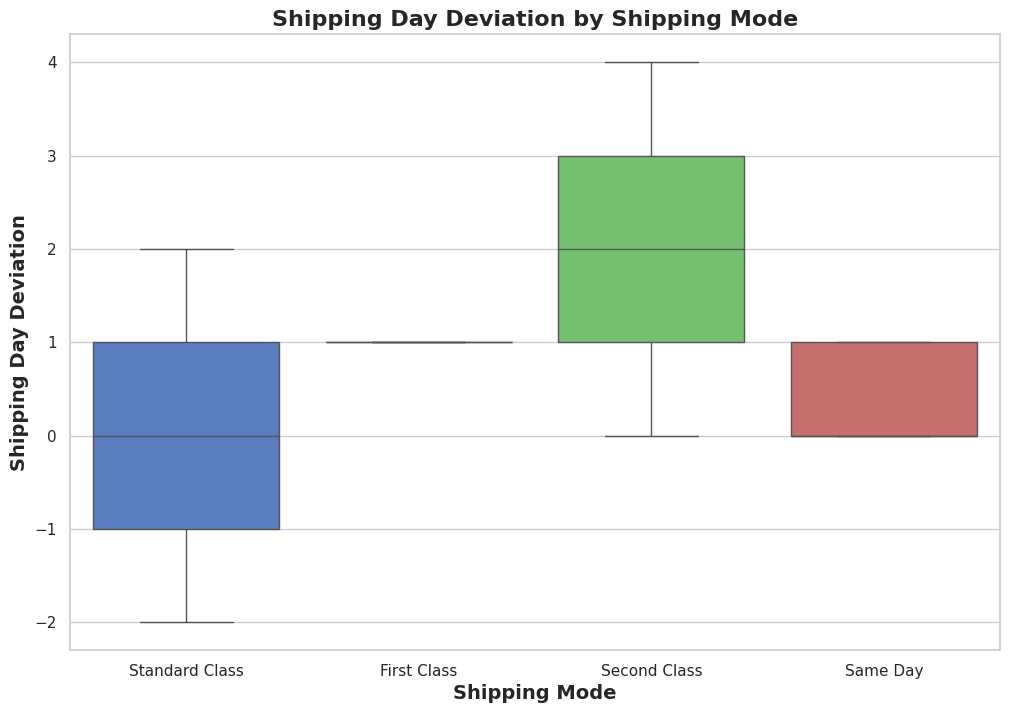

In [ ]:
# visualize data for shipping_day_deviation based on shipping mode
plt.figure(figsize=(12,8))
sns.boxplot(x='Shipping Mode', y='shipping_day_deviation', data=df, palette='muted')
plt.title('Shipping Day Deviation by Shipping Mode', fontsize=16, fontweight='bold')
plt.xlabel('Shipping Mode', fontsize=14, fontweight='bold')
plt.ylabel('Shipping Day Deviation', fontsize=14, fontweight='bold')
plt.show()

**Insights :**
1. Surprisingly, First Class shipping had the lowest on-time rate (4.68%), while **Standard Class achieved the highest on-time rate at 61.93%** which was about 13 times higher than First Class. Considering lower cost and higher on-time rate, no wonder that many customers prefer Standard Class over other options
2. Second Class shipping had a low on-time rate of 23.37% with deliveries up to 4 days later than scheduled
3. Some orders using Standard Class were shipped 1-2 days earlier than planned
4. With on-time rate of 54.26%, Same Day delivery were shipped either on schedule or delayed by one day

### **On-time Rate and Total Quantity by Month**

In [ ]:
df_late_month = on_time_rate(df, 'shipping_month')

# make new dataframe df_sales_month
df_quantity_month = df.groupby('shipping_month')['Order Item Total'].sum().reset_index()
df_quantity_month.columns = ['shipping_month', 'Total Quantity']

# merge df_late_month and df_sales_month
df_late_month = df_late_month.merge(df_quantity_month, on='shipping_month')

In [ ]:
df_late_month['month_number'] = df_late_month['shipping_month'].map(
    {'Jan' : 1,
     'Feb' : 2,
     'Mar' : 3,
     'Apr' : 4,
     'May' : 5,
     'Jun' : 6,
     'Jul' : 7,
     'Aug' : 8,
     'Sep' : 9,
     'Oct' : 10,
     'Nov' : 11,
     'Dec' : 12}
)
df_late_month = df_late_month.sort_values(by='month_number')

In [ ]:
df_late_month

shipping_month  On Time  Late  On Time Rate  Total Quantity month_number
0             Jan     7984  9420     45.874512    3.041205e+06            1
1             Feb     6704  8127     45.202616    2.645898e+06            2
2             Mar     7067  8819     44.485711    2.804170e+06            3
3             Apr     7099  8352     45.945246    2.743761e+06            4
4             May     7149  8694     45.124030    2.838568e+06            5
5             Jun     6898  8384     45.138071    2.769820e+06            6
6             Jul     7285  8669     45.662530    2.868697e+06            7
7             Aug     7069  8720     44.771676    2.839899e+06            8
8             Sep     6908  8631     44.455885    2.830916e+06            9
9             Oct     5993  7300     45.083879    2.716954e+06           10
10            Nov     5688  6788     45.591536    2.651654e+06           11
11            Dec     5698  7073     44.616710    2.302860e+06           12

In [ ]:
# function for double line plot with secondary axis
def double_line_plot(df, x_col, y1_col, y2_col, title, xlabel, ylabel1, ylabel2):
  # create figure and axis
  fig, ax1 = plt.subplots(figsize=(20,8))

  # plot 1st line chart
  sns.lineplot(x=x_col, y=y1_col, data=df, marker='o', color='navy', ax=ax1, label=y1_col)
  ax1.set_ylabel(ylabel1, fontsize=14, fontweight='bold')
  ax1.set_xlabel(xlabel, fontsize=14, fontweight='bold')

  # create secondary axis
  ax2 = ax1.twinx()

  # plot 2nd line chart
  sns.lineplot(x=x_col, y=y2_col, data=df, marker='o', color='firebrick', ax=ax2, label=y2_col)
  ax2.set_ylabel(ylabel2, fontsize=14, fontweight='bold')

  plt.title(title)

  # combine legends from both axes
  lines_1, labels_1 = ax1.get_legend_handles_labels()
  lines_2, labels_2 = ax2.get_legend_handles_labels()
  ax1.legend(lines_1 + lines_2, labels_1 + labels_2,loc='lower left', fontsize=12)

  plt.show()

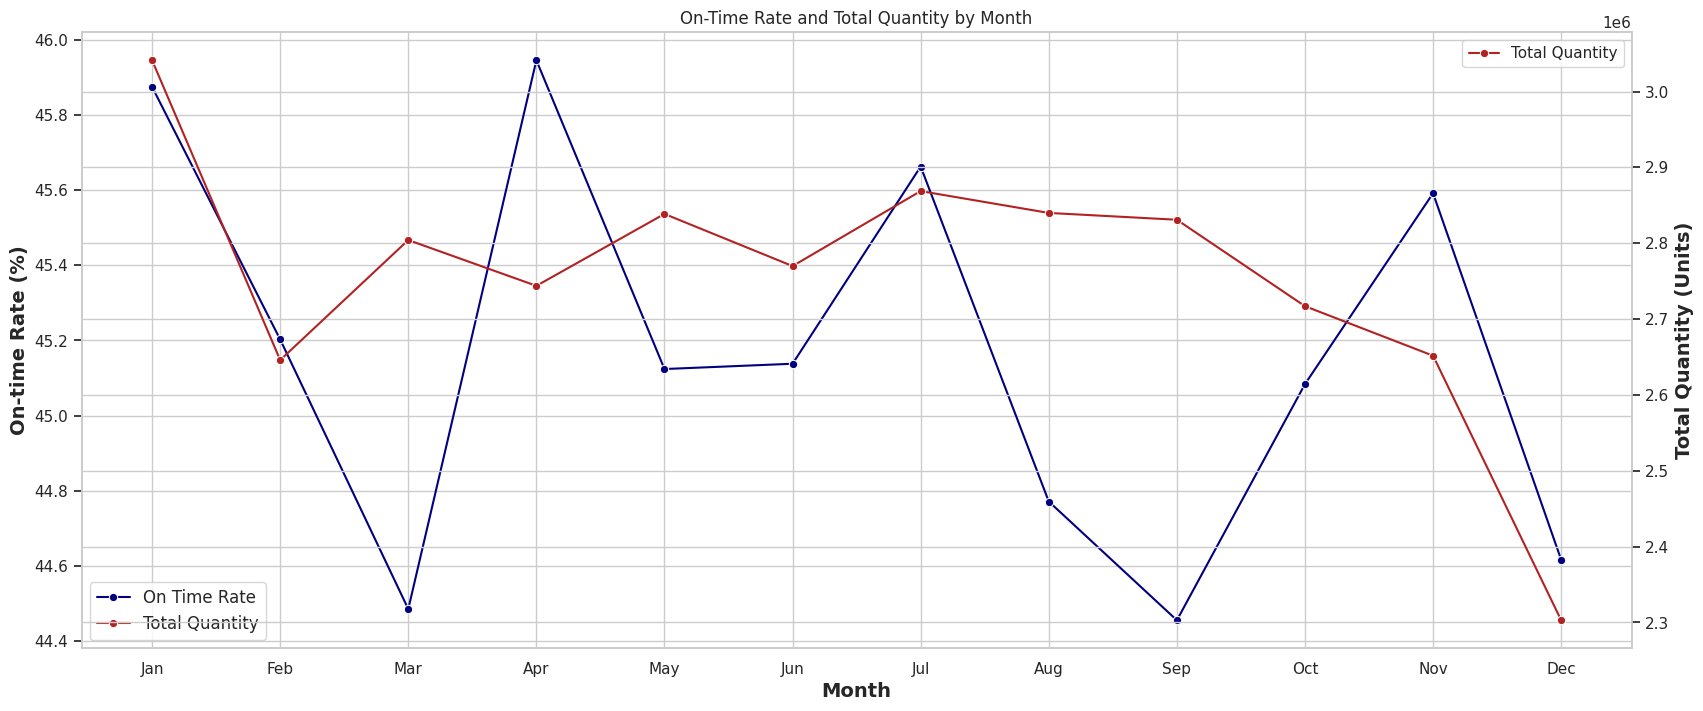

In [ ]:
double_line_plot(df_late_month, 'shipping_month', 'On Time Rate', 'Total Quantity',
                 'On-Time Rate and Total Quantity by Month', 'Month', 'On-time Rate (%)', 'Total Quantity (Units)')

**Insight :**
1. **On-time rate was quite stable at 44.5% - 46%** from January to December with the lowest rate occurring in March and September (44.5%) and the highest rate occurring in April (45.9%)
2. December had both the lowest total quantity sold and relatively low on-time rate, indicating that shipped volume did not influence low on-time rate this month
3. Despite a high volume of shipped products, January still achieved the second-highest on-time rate

### **On-time Rate and Total Quantity by Time**

In [ ]:
df_late_time = on_time_rate(df, 'shipping_TimeCategory')

# make new dataframe df_quantity_time
df_quantity_time = df.groupby('shipping_TimeCategory')['Order Item Total'].sum().reset_index()
df_quantity_time.columns = ['shipping_TimeCategory', 'Total Quantity']

# merge df_late_time and df_quantity_time
df_late_time = df_late_time.merge(df_quantity_time, on='shipping_TimeCategory')

# order
time_order = ['Morning', 'Afternoon', 'Evening']
df_late_time['shipping_TimeCategory'] = pd.Categorical(df_late_time['shipping_TimeCategory'], ordered=True, categories = time_order)

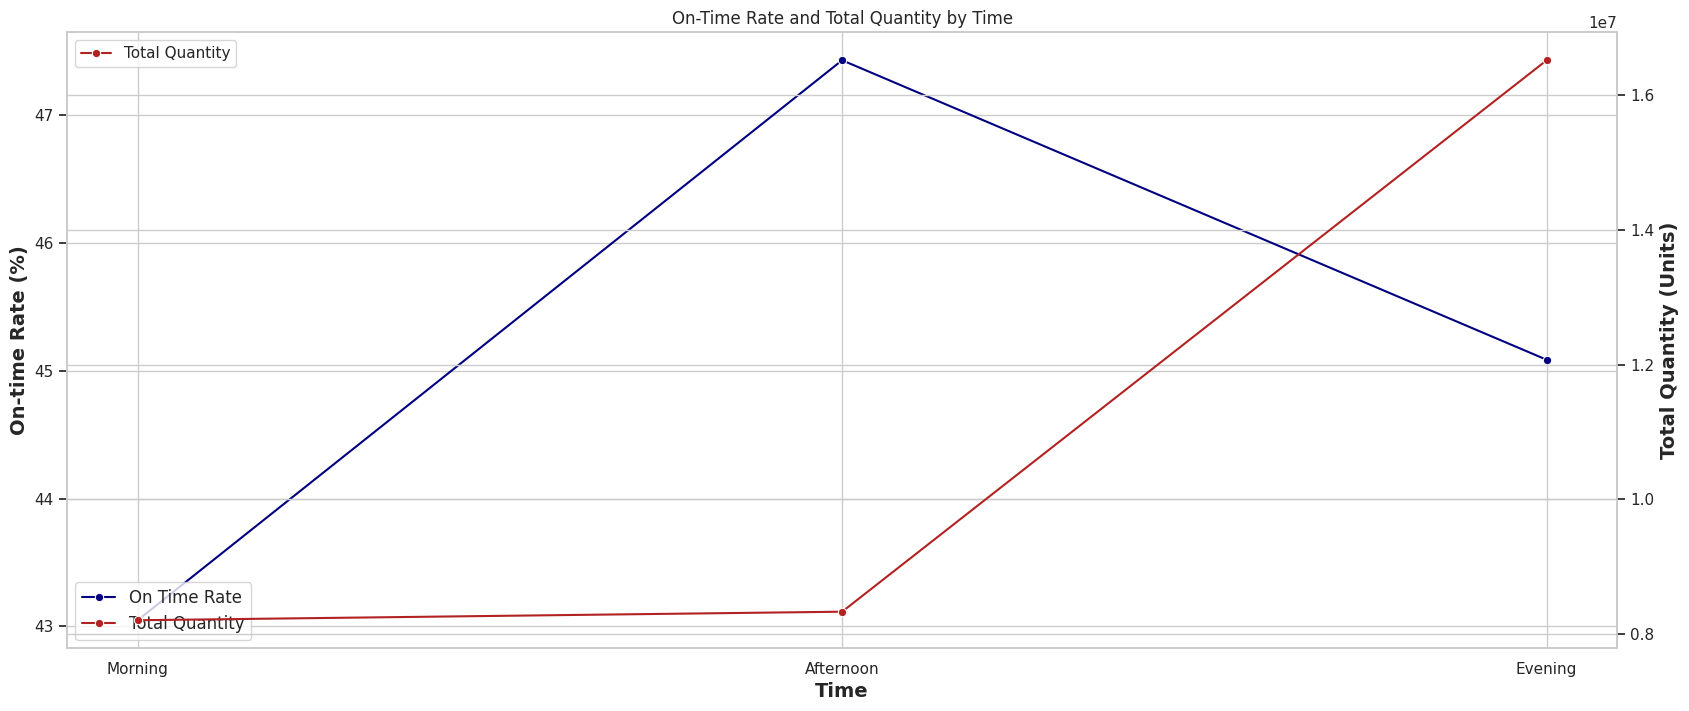

In [ ]:
double_line_plot(df_late_time, 'shipping_TimeCategory', 'On Time Rate', 'Total Quantity',
                 'On-Time Rate and Total Quantity by Time', 'Time', 'On-time Rate (%)', 'Total Quantity (Units)')

**Insights** :
1. Overall, the higher amount of shipped product the lower on-time rate
2. Morning had both the lowest number of shipped products and on-time rate

### **On-time Rate by Order Region**

In [ ]:
# on-time rate based on order region
df_late_region = on_time_rate(df, 'Order Region')

# sort values based on on-time rate and take top 10 region
df_late_region = df_late_region.sort_values(by='On Time Rate', ascending=False).head(10)

In [ ]:
df_late_region

Order Region  On Time  Late  On Time Rate
0            Canada      491   468     51.199166
19      West Africa     1743  1953     47.159091
1         Caribbean     3903  4415     46.922337
16  Southern Africa      540   617     46.672429
21     West of USA      3680  4313     46.040285
11          Oceania     4666  5482     45.979503
10  Northern Europe     4500  5292     45.955882
12    South America     6824  8111     45.691329
7      Eastern Asia     3325  3955     45.673077
17  Southern Europe     4302  5129     45.615523

In [ ]:
# make new dataframe "df_region_counts" to compare the overall proportion of region counts and on-time rate
df_region_counts = df['Order Region'].value_counts(normalize=True) * 100
df_region_counts = df_region_counts.reset_index()
df_region_counts.columns = ['Order Region', 'Percentage']

# merge df_late_region and df_region_counts
df_late_region = df_late_region.merge(df_region_counts, on='Order Region')

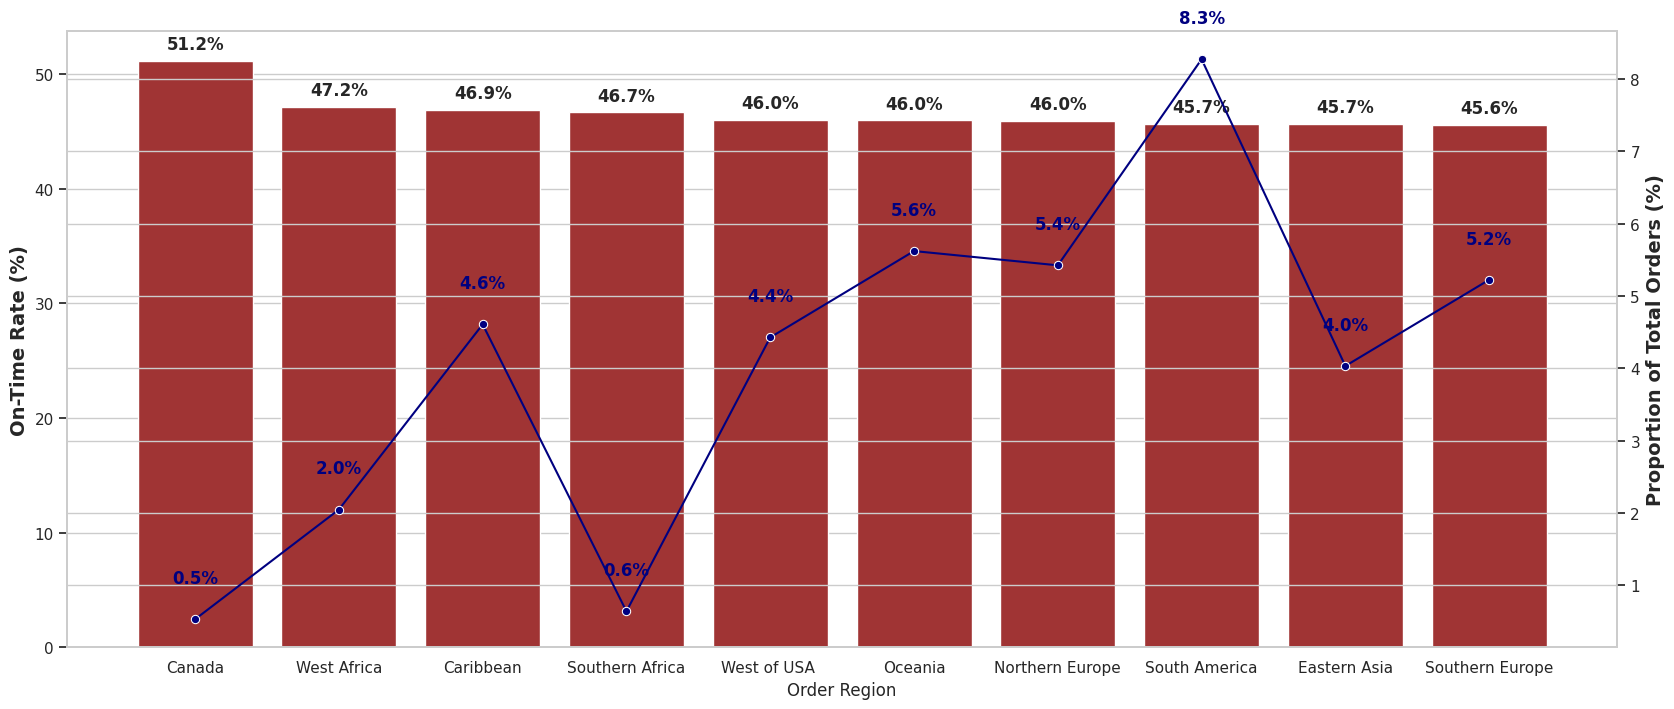

In [ ]:
# create figure, axis
fig, ax1 = plt.subplots(figsize=(20,8))

# plot bar chart
sns.barplot(x='Order Region', y='On Time Rate', data=df_late_region, ax=ax1, color = 'firebrick')
ax1.set_ylabel('On-Time Rate (%)', fontsize=14, fontweight='bold')
# add text on bars
for i, v in enumerate(df_late_region['On Time Rate']):
    ax1.text(i, v + 1, f'{v:.1f}%', ha='center', fontsize=12, fontweight='bold')

# create the secondary axis
ax2 = ax1.twinx()

# plot line chart
sns.lineplot(x='Order Region', y='Percentage', data=df_late_region, marker='o', color='navy', ax=ax2)
ax2.set_ylabel('Proportion of Total Orders (%)', fontsize=14, fontweight='bold')
# add text on line points
for i, v in enumerate(df_late_region['Percentage']):
    ax2.text(i, v + 0.5, f'{v:.1f}%', ha='center', fontsize=12, color='navy', fontweight='bold')

plt.show()

**Insights :**
1. Although total orders from Canada and Central Africa for only below than 1%, these regions ranked first and second for on-time rates (54.8% and 52.9%, respectively)
2. In contrast, Western Europe and Central America, which had the highest number of orders, did not make it to the top 10 in on-time performance


## **Store Performance**

### **Delayed Delivery Map**

In [ ]:
# filter delayed delivery
delayed = df[df['Late_delivery_risk']==1]

# create map
m = folium.Map(location=[20,0], zoom_start=2)

# add heatmap
heat_data = list(zip(delayed['Latitude'], delayed['Longitude']))
HeatMap(heat_data).add_to(m)
m

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# aggregate data by store_id and calculate total order item quantity
store_volume = df.groupby('Store_ID')['Order Item Quantity'].sum().reset_index()

# take top 10 stores
top10_stores = store_volume.sort_values('Order Item Quantity', ascending=False).head(10)['Store_ID']
df_top = df[df['Store_ID'].isin(top10_stores)]

In [ ]:
import plotly.graph_objects as go

# group by store and market
flow = df_top.groupby(['Store_ID', 'Market']).agg({'Order Item Quantity':'sum'}).reset_index()

# create nodes (store_id and market)
nodes = list(flow['Store_ID'].unique()) + list(flow['Market'].unique())

# mapping to index
node_dict = {name: i for i, name in enumerate(nodes)}

# source and target
sources = flow['Store_ID'].map(node_dict)
targets = flow['Market'].map(node_dict)
values  = flow['Order Item Quantity']

In [ ]:
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=20,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=nodes
    ),
    link=dict(
        source=sources,
        target=targets,
        value=values
    ))])

fig.update_layout(title_text='Sankey Diagram: Top 10 Stores to Market', font_size=12)
fig.show()

**Insights :**
1. Majority of stores were located in the USA, while most of orders were coming from Latin America and Europe rather than the USA
2. Since most of stores based in the USA and the order coming from all around the world, stores in the USA had higher delay rate as shown in Folium map
3. Top 10 stores with the highest shipment volume were 544, 404, 257, 643, 251, 49, 677, 1895, 689, and 782

### **On-time Rate by Store**

In [ ]:
# check on-time rate top 10 stores
df_top_late = on_time_rate(df_top, 'Store_ID')

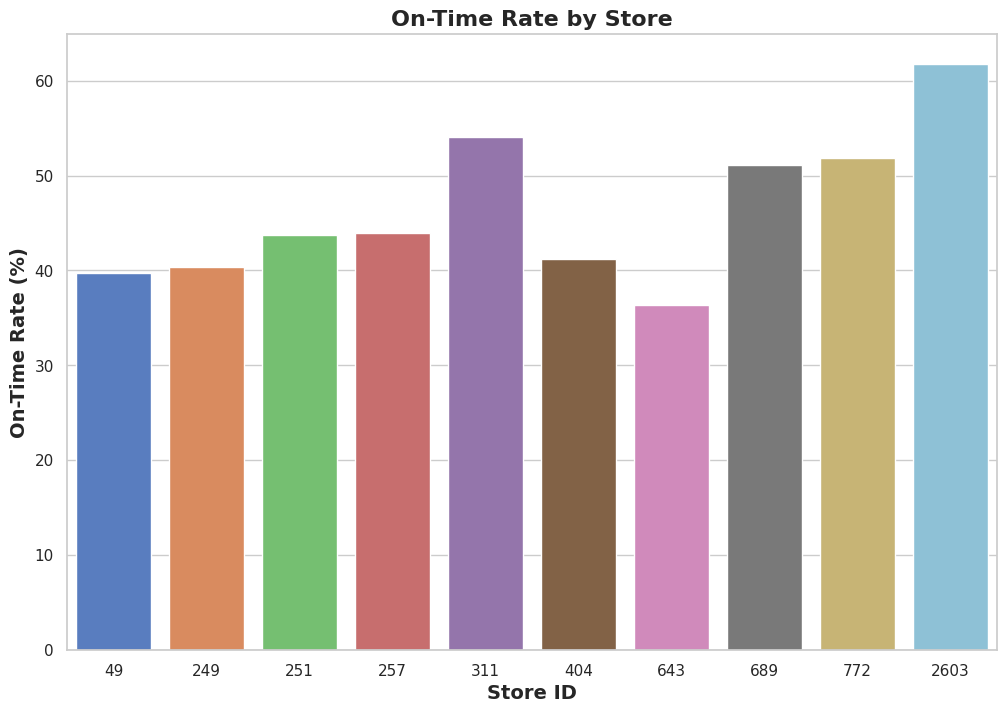

In [ ]:
# visualization
plt.figure(figsize=(12,8))
sns.barplot(x='Store_ID', y='On Time Rate', data=df_top_late, palette='muted')
plt.title('On-Time Rate by Store', fontsize=16, fontweight='bold')
plt.xlabel('Store ID', fontsize=14, fontweight='bold')
plt.ylabel('On-Time Rate (%)', fontsize=14, fontweight='bold')
plt.show()

**Insight :** Most of top 10 countries with the highest shipment volume had on-time rate <= 40% which may indicate that high volume influence store performance in shipping products

### **Actual Lead Time vs Expected Lead Time**

In [ ]:
# aggregate data to find out the average days for actual and expected shipping as well as gap between them
store_lead = df.groupby('Store_ID').agg(
    {'Days for shipping (real)' : 'mean',
    'Days for shipment (scheduled)' : 'mean',
     'shipping_day_deviation' : 'mean'}
).reset_index()
store_lead.columns = ['Store_ID', 'Actual Lead Time', 'Expected Actual Lead Time', 'Shipping Day Gap']

In [ ]:
store_lead.mean()

Store_ID                     5918.000000
Actual Lead Time                3.497607
Expected Actual Lead Time       2.931644
Shipping Day Gap                0.565963
dtype: float64

In [ ]:
len(store_lead[store_lead['Shipping Day Gap']>0.5])/len(store_lead) * 100

54.34727503168568

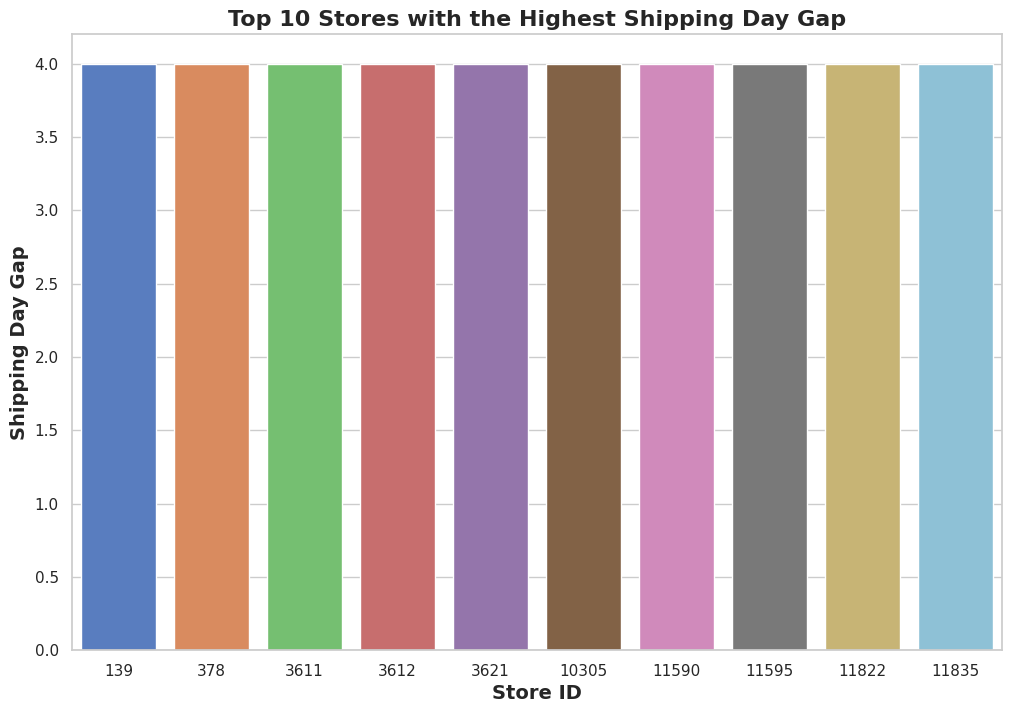

In [ ]:
top_10_stores = store_lead.sort_values(by='Shipping Day Gap', ascending=False).head(10)

# visualization
plt.figure(figsize=(12,8))
sns.barplot(x='Store_ID', y='Shipping Day Gap', data=top_10_stores, palette='muted')
plt.title('Top 10 Stores with the Highest Shipping Day Gap', fontsize=16, fontweight='bold')
plt.xlabel('Store ID', fontsize=14, fontweight='bold')
plt.ylabel('Shipping Day Gap', fontsize=14, fontweight='bold')
plt.show()

**Insights :**
1. On average, stores in the e-commerce had an actual lead time of 3.5 days and an expected lead time of 3 days, making the **shipping day gap at 0.5 days**
2. More than half of total stores **(54.3%) shipped their products later than expected by more than 0.5 days**, with the worst delay reaching 4 days

## **Product Analysis**

### **Total Quantity vs Discount Rate**

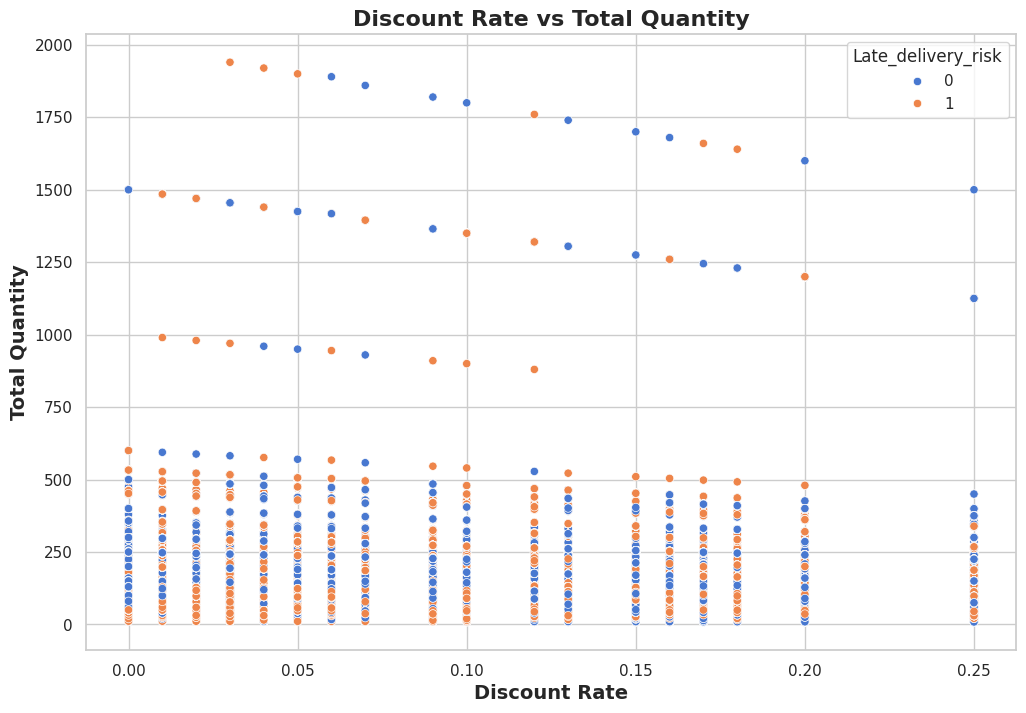

In [ ]:
# visualize
plt.figure(figsize=(12,8))
sns.scatterplot(data=df, x='Order Item Discount Rate', y='Order Item Total', hue='Late_delivery_risk', palette='muted')
plt.title('Discount Rate vs Total Quantity', fontsize=16, fontweight='bold')
plt.xlabel('Discount Rate', fontsize=14, fontweight='bold')
plt.ylabel('Total Quantity', fontsize=14, fontweight='bold')
plt.show()

**Insights :**
1. Scatter plot shows that there is no strong relationship between discount rate and total quantity ordered which indicate that customers purchased products regardless discount. They purchased products because they need/want those products
2. There is also no relationship between higher total quantity ordered and late delivery risk

## **Correlation Analysis**

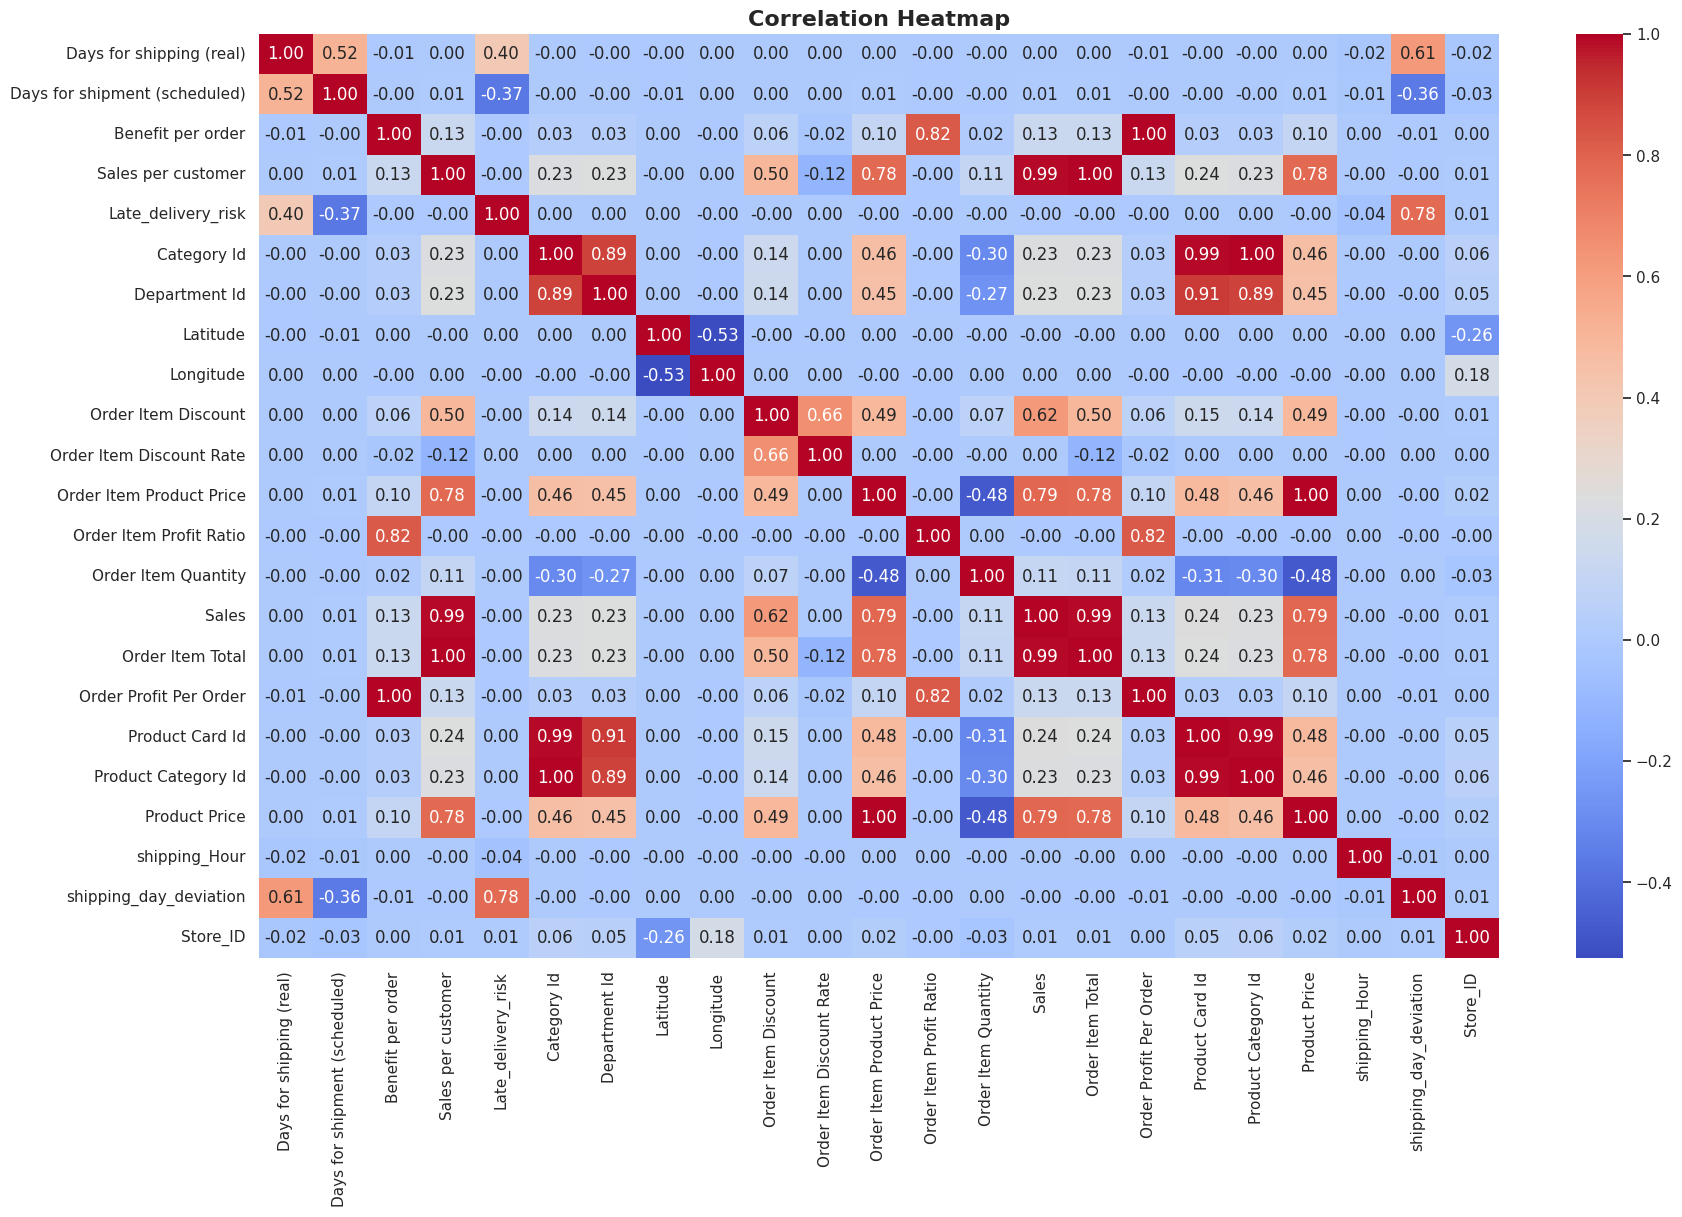

In [ ]:
excluded_cols = ['Customer Id', 'Customer Zipcode', 'Order Customer Id', 'order date (DateOrders)',
                 'Order Id', 'Order Item Cardprod Id', 'Order Item Id', 'Product Status']
numeric_cols = [col for col in df.select_dtypes(include = 'number').columns if not col in excluded_cols]

corr = df[numeric_cols].corr()

# visualization
plt.figure(figsize=(20,12))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap', fontsize=16, fontweight='bold')
plt.show()

**Insights :**
1. `Order Profit Per Order` and `Benefit per order` columns are proven to have identic values, shown by correlation value of 1
2. `Days for shipping (real)` and `Days for shipment (scheduled)` have moderate correlations with `Late_delivery_risk`. Meanwhile, `shipping_day_deviation` has strong correlation with `Late_delivery_risk`
3. `Sales` has almost perfect correlation (0.99) with `Order Item Total`
4. `Order Item Profit Ratio` has strong correlation with `Order Profit Per Order` and `Benefit per order` (0.82)
5. `Product Price` and `Order Item Product Price` columns are proven to have identic values, shown by correlation value of 1
6. `Sales` and `Sales per customer` columns have strong correlation with `Product Price` which indicate that high product price influence high sales


# **TRAIN-TEST SPLIT**

In [ ]:
df.columns

Index(['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)',
       'Benefit per order', 'Sales per customer', 'Delivery Status',
       'Late_delivery_risk', 'Category Id', 'Category Name', 'Customer City',
       'Customer Country', 'Customer Email', 'Customer Fname', 'Customer Id',
       'Customer Lname', 'Customer Password', 'Customer Segment',
       'Customer State', 'Customer Street', 'Department Id', 'Department Name',
       'Latitude', 'Longitude', 'Market', 'Order City', 'Order Country',
       'Order Customer Id', 'order date (DateOrders)', 'Order Id',
       'Order Item Cardprod Id', 'Order Item Discount',
       'Order Item Discount Rate', 'Order Item Id', 'Order Item Product Price',
       'Order Item Profit Ratio', 'Order Item Quantity', 'Sales',
       'Order Item Total', 'Order Profit Per Order', 'Order Region',
       'Order State', 'Order Status', 'Product Card Id', 'Product Category Id',
       'Product Image', 'Product Name', 'Product Price', 'Prod

In [ ]:
# drop  some columns containing irrelevant information, duplicated columns, and
# columns that are possibly leading to data leakage

drop_cols = ['Customer Email', 'Customer Id', 'Customer Fname', 'Customer Lname',
             'Customer Password', 'Order Id', 'Department Name', 'Order Customer Id', 'Product Image',
             'shipping date (DateOrders)', 'Late_delivery_risk', 'order date (DateOrders)', 'Days for shipping (real)',
             'shipping_day_deviation', 'Order Status','Order Item Product Price',
             'Order Profit Per Order','Order Item Total', 'Order Item Cardprod Id',
             'Delivery Status', 'Category Name', 'Product Name']
# Notes
# Columns that are possibly leading to data leakage since it's related to target feature
# "Days for shipping (real)", "shipping_day_deviation", "Delivery_status", "Order Status"

# Columns that are defining other columns :
# "Department Name" vs "Department Id"
# "Category Name" vs "Category Id"
# "Product Name" vs "Product Id"

# Identic Columns
# "Order Item Product Price" vs "Product Price"
# "Order Profit Per Order" vs "Benefit per Order"
# "Order Item Cardprod Id" vs "Product Card Id"


# select features and target
X = df.drop(columns = drop_cols, axis=1)
y = df['Late_delivery_risk']

# split dataset into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# check the number of samples
X_train.shape, X_test.shape

((144415, 34), (36104, 34))

# **DATA PREPROCESSING**

## **Missing Values**

In [ ]:
# check missing values
X_train.isna().sum()

Type                             0
Days for shipment (scheduled)    0
Benefit per order                0
Sales per customer               0
Category Id                      0
Customer City                    0
Customer Country                 0
Customer Segment                 0
Customer State                   0
Customer Street                  0
Department Id                    0
Latitude                         0
Longitude                        0
Market                           0
Order City                       0
Order Country                    0
Order Item Discount              0
Order Item Discount Rate         0
Order Item Id                    0
Order Item Profit Ratio          0
Order Item Quantity              0
Sales                            0
Order Region                     0
Order State                      0
Product Card Id                  0
Product Category Id              0
Product Price                    0
Product Status                   0
Shipping Mode                    0
shipping_month                   0
shipping_DayofWeek               0
shipping_Hour                    0
shipping_TimeCategory            0
Store_ID                         0
dtype: int64

In [ ]:
X_test.isna().sum()

Type                             0
Days for shipment (scheduled)    0
Benefit per order                0
Sales per customer               0
Category Id                      0
Customer City                    0
Customer Country                 0
Customer Segment                 0
Customer State                   0
Customer Street                  0
Department Id                    0
Latitude                         0
Longitude                        0
Market                           0
Order City                       0
Order Country                    0
Order Item Discount              0
Order Item Discount Rate         0
Order Item Id                    0
Order Item Profit Ratio          0
Order Item Quantity              0
Sales                            0
Order Region                     0
Order State                      0
Product Card Id                  0
Product Category Id              0
Product Price                    0
Product Status                   0
Shipping Mode                    0
shipping_month                   0
shipping_DayofWeek               0
shipping_Hour                    0
shipping_TimeCategory            0
Store_ID                         0
dtype: int64

**Observation :** no missing values in both X_train and X_test

## **Outliers**

In [ ]:
numeric_cols = [col for col in X_train.select_dtypes(include = 'number').columns]

# plot boxplot and histogram
distribution_data(X_train, numeric_cols)

Output hidden; open in https://colab.research.google.com to view.

**Observation :** Outliers will be transformed

In [ ]:
X_train.describe()

Days for shipment (scheduled)  Benefit per order  Sales per customer  \
count                  144415.000000      144415.000000       144415.000000   
mean                        2.931323          21.898464          182.860234   
std                         1.374391         105.180860          120.231496   
min                         0.000000       -4274.979980            7.490000   
25%                         2.000000           7.040000          104.370003   
50%                         4.000000          31.520000          163.990005   
75%                         4.000000          64.790001          246.149994   
max                         4.000000         911.799988         1939.989990   

         Category Id  Department Id       Latitude      Longitude  \
count  144415.000000  144415.000000  144415.000000  144415.000000   
mean       31.821937       5.441270      29.726891     -84.944885   
std        15.641587       1.630026       9.812487      21.430212   
min         2.000000       2.000000     -33.937553    -158.025986   
25%        18.000000       4.000000      18.265659     -98.469292   
50%        29.000000       5.000000      33.144863     -76.873627   
75%        45.000000       7.000000      39.279617     -66.370583   
max        76.000000      12.000000      48.781933     115.263077   

       Order Item Discount  Order Item Discount Rate  Order Item Id  \
count        144415.000000             144415.000000  144415.000000   
mean             20.667788                  0.101812   90319.670221   
std              21.790961                  0.070491   52097.009863   
min               0.000000                  0.000000       2.000000   
25%               5.500000                  0.040000   45336.500000   
50%              14.000000                  0.100000   90265.000000   
75%              29.990000                  0.160000  135455.500000   
max             375.000000                  0.250000  180519.000000   

       Order Item Profit Ratio  Order Item Quantity          Sales  \
count            144415.000000        144415.000000  144415.000000   
mean                  0.120512             2.129606     203.527768   
std                   0.467453             1.453407     132.418554   
min                  -2.750000             1.000000       9.990000   
25%                   0.080000             1.000000     119.980003   
50%                   0.270000             1.000000     199.919998   
75%                   0.360000             3.000000     299.950012   
max                   0.500000             5.000000    1999.989990   

       Product Card Id  Product Category Id  Product Price  Product Status  \
count    144415.000000        144415.000000  144415.000000        144415.0   
mean        691.805553            31.821937     140.873767             0.0   
std         336.461204            15.641587     139.788808             0.0   
min          19.000000             2.000000       9.990000             0.0   
25%         403.000000            18.000000      50.000000             0.0   
50%         627.000000            29.000000      59.990002             0.0   
75%        1004.000000            45.000000     199.990005             0.0   
max        1363.000000            76.000000    1999.989990             0.0   

       shipping_Hour       Store_ID  
count  144415.000000  144415.000000  
mean       11.507503    3716.337230  
std         6.919519    2884.978181  
min         0.000000       2.000000  
25%         5.000000    1280.000000  
50%        12.000000    2916.000000  
75%        17.000000    5690.500000  
max        23.000000   11835.000000

As there are some outliers in some columns, I will experiment by comparing model performance using log transformed and original columns

In [ ]:
# list columns that will be transformed to logaritmic versions
log_transform_cols = ['Sales per customer', 'Order Item Discount','Product Price']

X_train_log = X_train.copy()
X_test_log = X_test.copy()

for col in log_transform_cols :
  # add +1 just in case there are 0 values in columns
  X_train_log[f'log_{col}'] = np.log(X_train_log[col] + 1)
  X_test_log[f'log_{col}'] = np.log(X_test_log[col] + 1)

# drop columns
X_train_log.drop(columns = log_transform_cols, axis=1, inplace=True)
X_test_log.drop(columns = log_transform_cols, axis=1, inplace=True)

## **Feature Encoding**

Before feature encoding, we need to make sure that all the values in categorical columns have consistent naming. This inspection is necessary to avoid the same names with different style (e.g lowercase, uppercase, etc)

In [ ]:
categorical_cols = [col for col in X_train.select_dtypes(include = ['object', 'category']).columns]
for col in X_train[categorical_cols].columns :
  print(f'{col} : {X_train[col].unique()}')

Type : ['TRANSFER' 'PAYMENT' 'DEBIT' 'CASH']
Customer City : ['Los Angeles' 'Chicago' 'Caguas' 'Knoxville' 'Cumberland'
 'Fort Lauderdale' 'Baldwin Park' 'Saint Charles' 'Seattle' 'Carlsbad'
 'Corona' 'Brighton' 'Rowland Heights' 'Miami' 'Stockton' 'Tucson'
 'Diamond Bar' 'North Hills' 'Beloit' 'Albuquerque' 'Brooklyn' 'Vista'
 'Dallas' 'Detroit' 'Williamsport' 'Wichita' 'Tinley Park' 'San Jose'
 'College Station' 'Aurora' 'Staten Island' 'Wheeling' 'Riverside'
 'Harvey' 'Bronx' 'Lithonia' 'Woodbridge' 'West Orange' 'Elk Grove'
 'Mchenry' 'Memphis' 'San Antonio' 'Martinez' 'Hilliard' 'Hyattsville'
 'San Diego' 'Temecula' 'Union City' 'Mount Pleasant' 'Houston'
 'Pittsburg' 'San Bernardino' 'Lombard' 'Sanford' 'New Bedford'
 'Brownsville' 'Honolulu' 'Victorville' 'Tallahassee' 'San Marcos'
 'Washington' 'Trujillo Alto' 'Rio Rancho' 'North Richland Hills'
 'San Benito' 'Jersey City' 'Mayaguez' 'York' 'East Lansing' 'Pomona'
 'Azusa' 'Philadelphia' 'Carrollton' 'Metairie' 'Fairfield' 'Han

**Observations :** `Order Country_en`, `Order State_en`, `Order City_en` have incosistent names, so values in these columns will be standardized to lowercase


In [ ]:
# Training data
X_train['Order Country'] = X_train['Order Country'].str.lower()
X_train['Order State'] = X_train['Order State'].str.lower()
X_train['Order City'] = X_train['Order City'].str.lower()
X_train_log['Order Country'] = X_train_log['Order Country'].str.lower()
X_train_log['Order State'] = X_train_log['Order State'].str.lower()
X_train_log['Order City'] = X_train_log['Order City'].str.lower()

# Testing data
X_test['Order Country'] = X_test['Order Country'].str.lower()
X_test['Order State'] = X_test['Order State'].str.lower()
X_test['Order City'] = X_test['Order City'].str.lower()
X_test_log['Order Country'] = X_test_log['Order Country'].str.lower()
X_test_log['Order State'] = X_test_log['Order State'].str.lower()
X_test_log['Order City'] = X_test_log['Order City'].str.lower()

After looking at unique values in each column, these feature encoding techniques will be used :
1. **Target Encoding :** this technique will be applied to columns with large number of unique values such as `Order Country`, `Order State`, `Order City`
2. **Ordinal Encoding :** this technique will be applied to columns with hierarchial order such as `shipping_month`, `shipping_DayOfWeek`, `shipping_TimeCategory`
3. **Label Encoding** : this technique will be applied to remaining columns since remaining columns do not have order

### **Ordinal Encoding**

In [ ]:
# Ordinal encoding
# mapping month to number
month_map = {
    'Jan' : 1,
    'Feb' : 2,
    'Mar' : 3,
    'Apr' : 4,
    'May' : 5,
    'Jun' : 6,
    'Jul' : 7,
    'Aug' : 8,
    'Sep' : 9,
    'Oct' : 10,
    'Nov' : 11,
    'Dec' : 12
}

# map to columns
X_train['shipping_month'] = X_train['shipping_month'].replace(month_map)
X_test['shipping_month'] = X_test['shipping_month'].replace(month_map)
X_train_log['shipping_month'] = X_train_log['shipping_month'].replace(month_map)
X_test_log['shipping_month'] = X_test_log['shipping_month'].replace(month_map)

In [ ]:
day_map = {
    'Monday' : 1,
    'Tuesday' : 2,
    'Wednesday' : 3,
    'Thursday' : 4,
    'Friday' : 5,
    'Saturday' : 6,
    'Sunday' : 7
}
X_train['shipping_DayofWeek'] = X_train['shipping_DayofWeek'].replace(day_map)
X_test['shipping_DayofWeek'] = X_test['shipping_DayofWeek'].replace(day_map)
X_train_log['shipping_DayofWeek'] = X_train_log['shipping_DayofWeek'].replace(day_map)
X_test_log['shipping_DayofWeek'] = X_test_log['shipping_DayofWeek'].replace(day_map)

In [ ]:
# make sure that the data type is integer
X_train['shipping_month'] = X_train['shipping_month'].astype(int)
X_test['shipping_month'] = X_test['shipping_month'].astype(int)
X_train_log['shipping_month'] = X_train_log['shipping_month'].astype(int)
X_test_log['shipping_month'] = X_test_log['shipping_month'].astype(int)

X_train['shipping_DayofWeek'] = X_train['shipping_DayofWeek'].astype(int)
X_test['shipping_DayofWeek'] = X_test['shipping_DayofWeek'].astype(int)
X_train_log['shipping_DayofWeek'] = X_train_log['shipping_DayofWeek'].astype(int)
X_test_log['shipping_DayofWeek'] = X_test_log['shipping_DayofWeek'].astype(int)

In [ ]:
time_map = {
    'Morning' : 1,
    'Afternoon' : 2,
    'Evening' : 3
}
X_train['shipping_TimeCategory'] = X_train['shipping_TimeCategory'].replace(time_map)
X_test['shipping_TimeCategory'] = X_test['shipping_TimeCategory'].replace(time_map)
X_train_log['shipping_TimeCategory'] = X_train_log['shipping_TimeCategory'].replace(time_map)
X_test_log['shipping_TimeCategory'] = X_test_log['shipping_TimeCategory'].replace(time_map)

### **Target Encoding**

In [ ]:
# Target encoding
# for columns Category Name, Order Country, Order State, Order City
# import library
!pip install category_encoders
from category_encoders import TargetEncoder

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 7.3 MB/s eta 0:00:00


In [ ]:
X_train.columns

Index(['Type', 'Days for shipment (scheduled)', 'Benefit per order',
       'Sales per customer', 'Category Id', 'Customer City',
       'Customer Country', 'Customer Segment', 'Customer State',
       'Customer Street', 'Department Id', 'Latitude', 'Longitude', 'Market',
       'Order City', 'Order Country', 'Order Item Discount',
       'Order Item Discount Rate', 'Order Item Id', 'Order Item Profit Ratio',
       'Order Item Quantity', 'Sales', 'Order Region', 'Order State',
       'Product Card Id', 'Product Category Id', 'Product Price',
       'Product Status', 'Shipping Mode', 'shipping_month',
       'shipping_DayofWeek', 'shipping_Hour', 'shipping_TimeCategory',
       'Store_ID'],
      dtype='object')

In [ ]:
# list all the columns that will be target encoded
target_encoding_features = ['Order Country', 'Order State', 'Order City', 'Customer City',
                            'Customer Country', 'Customer Country', 'Customer State','Customer Street']

for col in target_encoding_features :
  te = TargetEncoder()

  # fit & transform to training data
  X_train[f'{col}_encoded'] = te.fit_transform(X_train[col], y_train)
  X_test[f'{col}_encoded'] = te.transform(X_test[col])
  X_train_log[f'{col}_encoded'] = te.fit_transform(X_train_log[col], y_train)
  X_test_log[f'{col}_encoded'] = te.transform(X_test_log[col])

In [ ]:
# drop columns
X_train.drop(columns = target_encoding_features, axis=1, inplace=True)
X_test.drop(columns = target_encoding_features, axis=1, inplace=True)
X_train_log.drop(columns = target_encoding_features, axis=1, inplace=True)
X_test_log.drop(columns = target_encoding_features, axis=1, inplace=True)

### **Label Encoding**

In [ ]:
except_features = target_encoding_features + ['shipping_month', 'shipping_TimeCategory', 'shipping_DayofWeek']
label_features = [col for col in categorical_cols if col not in except_features]

for col in label_features :
  le = LabelEncoder()
  X_train[f'{col}_encoded'] = le.fit_transform(X_train[col])
  X_test[f'{col}_encoded'] = le.transform(X_test[col])
  X_train_log[f'{col}_encoded'] = le.fit_transform(X_train_log[col])
  X_test_log[f'{col}_encoded'] = le.transform(X_test_log[col])


# drop columns
X_train.drop(columns = label_features, axis=1, inplace=True)
X_test.drop(columns = label_features, axis=1, inplace=True)
X_train_log.drop(columns = label_features, axis=1, inplace=True)
X_test_log.drop(columns = label_features, axis=1, inplace=True)


## **Feature Scaling**

In [ ]:
scaler = StandardScaler()
#scale only continuous features
scaled_columns = [col for col in X_train.columns if X_train[col].dtype in ['int64', 'float64']]

X_train[scaled_columns] = scaler.fit_transform(X_train[scaled_columns])
X_test[scaled_columns] = scaler.transform(X_test[scaled_columns])

scaled_columns_log = [col for col in X_train_log.columns if X_train_log[col].dtype in ['int64', 'float64']]
X_train_log[scaled_columns] = scaler.fit_transform(X_train_log[scaled_columns_log])
X_test_log[scaled_columns] = scaler.transform(X_test_log[scaled_columns_log])

# **MODEL BUILDING**

In this project, different types of machine learning algorithms will be implemented to get an idea about which algorithm performs better. All these models will be compared based on their evaluation metrics (precision, recall, F1-score). As delivery late risk has binary values (late vs on-time), this prediction can be categorized ad classification problem, the algorithms that I am gonna use as follows:

* Logistic Regression
* Random Forest
* XGBoost
* Decision Tree


Baseline models will be developed to evaluate their initial performances

## **Baseline Model (Original Dataset)**




### **Logistic Regression**

In [ ]:
lr = LogisticRegression(random_state = 42)

# fitting the model to training data
lr.fit(X_train, y_train)

LogisticRegression(random_state=42)

### **Random Forest**

In [ ]:
rf = RandomForestClassifier(random_state=42)

# fitting the model to training data
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

### **XGBoost**

In [ ]:
xgb = XGBClassifier(random_state=42)

# fitting the model to training data
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

### **Decision Tree**

In [ ]:
dt = DecisionTreeClassifier(random_state=42)

# fitting the model to training data
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

## **Baseline Model (Outlier Handling)**

### **Logistict Regressions**

In [ ]:
lr_log = LogisticRegression(random_state = 42)

# fitting the model to training data
lr_log.fit(X_train_log, y_train)

LogisticRegression(random_state=42)

### **Random Forest**

In [ ]:
rf_log = RandomForestClassifier(random_state=42)

# fitting the model to training data
rf_log.fit(X_train_log, y_train)

RandomForestClassifier(random_state=42)

### **XGBoost**

In [ ]:
xgb_log = XGBClassifier(random_state=42)

# fitting the model to training data
xgb_log.fit(X_train_log, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

### **Decision Tree**

In [ ]:
dt_log = DecisionTreeClassifier(random_state=42)

# fitting the model to training data
dt_log.fit(X_train_log, y_train)

DecisionTreeClassifier(random_state=42)

## **Baseline Model Evaluation**

`Late_delivery_risk` has quite balanced dataset with 55% of dataset has 1 (late) value, so accuracy score will be chosen as main metric

### **Original Dataset**

In [ ]:
# prediction for training data
y_pred_train_lr = lr.predict(X_train)
y_pred_train_rf = rf.predict(X_train)
y_pred_train_xgb = xgb.predict(X_train)
y_pred_train_dt = dt.predict(X_train)

# prediction for testing data
y_pred_test_lr = lr.predict(X_test)
y_pred_test_rf = rf.predict(X_test)
y_pred_test_xgb = xgb.predict(X_test)
y_pred_test_dt = dt.predict(X_test)

In [ ]:
# baseline model comparisons
model_metrics = {
    'Logistic Regression' : {
        'accuracy_score_train' : accuracy_score(y_train, y_pred_train_lr),
        'accuracy_score_test' : accuracy_score(y_test, y_pred_test_lr),
        'precision_score_train' : precision_score(y_train, y_pred_train_lr),
        'precision_score_test' : precision_score(y_test, y_pred_test_lr),
        'recall_score_train' : recall_score(y_train, y_pred_train_lr),
        'recall_score_test' : recall_score(y_test, y_pred_test_lr),
        'f1_score_train' : f1_score(y_train, y_pred_train_lr),
        'f1_score_test' : f1_score(y_test, y_pred_test_lr)},
    'Random Forest' : {
        'accuracy_score_train' : accuracy_score(y_train, y_pred_train_rf),
        'accuracy_score_test' : accuracy_score(y_test, y_pred_test_rf),
        'precision_score_train' : precision_score(y_train, y_pred_train_rf),
        'precision_score_test' : precision_score(y_test, y_pred_test_rf),
        'recall_score_train' : recall_score(y_train, y_pred_train_rf),
        'recall_score_test' : recall_score(y_test, y_pred_test_rf),
        'f1_score_train' : f1_score(y_train, y_pred_train_rf),
        'f1_score_test' : f1_score(y_test, y_pred_test_rf)},
    'XGBoost' : {
        'accuracy_score_train' : accuracy_score(y_train, y_pred_train_xgb),
        'accuracy_score_test' : accuracy_score(y_test, y_pred_test_xgb),
        'precision_score_train' : precision_score(y_train, y_pred_train_xgb),
        'precision_score_test' : precision_score(y_test, y_pred_test_xgb),
        'recall_score_train' : recall_score(y_train, y_pred_train_xgb),
        'recall_score_test' : recall_score(y_test, y_pred_test_xgb),
        'f1_score_train' : f1_score(y_train, y_pred_train_xgb),
        'f1_score_test' : f1_score(y_test, y_pred_test_xgb)},
    'Decision Tree' : {
        'accuracy_score_train' : accuracy_score(y_train, y_pred_train_dt),
        'accuracy_score_test' : accuracy_score(y_test, y_pred_test_dt),
        'precision_score_train' : precision_score(y_train, y_pred_train_dt),
        'precision_score_test' : precision_score(y_test, y_pred_test_dt),
        'recall_score_train' : recall_score(y_train, y_pred_train_dt),
        'recall_score_test' : recall_score(y_test, y_pred_test_dt),
        'f1_score_train' : f1_score(y_train, y_pred_train_dt),
        'f1_score_test' : f1_score(y_test, y_pred_test_dt)}
    }


model_performance = pd.DataFrame(model_metrics).reset_index().rename(columns = {'index' : 'Metrics'})
model_performance

Metrics  Logistic Regression  Random Forest   XGBoost  \
0   accuracy_score_train             0.733428       1.000000  0.832040   
1    accuracy_score_test             0.694909       0.900288  0.778778   
2  precision_score_train             0.765766       1.000000  0.865322   
3   precision_score_test             0.728080       0.922876  0.811019   
4     recall_score_train             0.740225       1.000000  0.821521   
5      recall_score_test             0.708037       0.892762  0.777795   
6         f1_score_train             0.752779       1.000000  0.842853   
7          f1_score_test             0.717919       0.907569  0.794059   

   Decision Tree  
0       1.000000  
1       0.912974  
2       1.000000  
3       0.918867  
4       1.000000  
5       0.922766  
6       1.000000  
7       0.920813

### **Outlier Handling**

In [ ]:
# prediction for training data
y_pred_train_log_lr = lr_log.predict(X_train_log)
y_pred_train_log_rf = rf_log.predict(X_train_log)
y_pred_train_log_xgb = xgb_log.predict(X_train_log)
y_pred_train_log_dt = dt_log.predict(X_train_log)

# prediction for testing data
y_pred_test_log_lr = lr_log.predict(X_test_log)
y_pred_test_log_rf = rf_log.predict(X_test_log)
y_pred_test_log_xgb = xgb_log.predict(X_test_log)
y_pred_test_log_dt = dt_log.predict(X_test_log)

In [ ]:
# baseline model comparisons
model_metrics = {
    'Logistic Regression' : {
        'accuracy_score_train' : accuracy_score(y_train, y_pred_train_log_lr),
        'accuracy_score_test' : accuracy_score(y_test, y_pred_test_log_lr),
        'precision_score_train' : precision_score(y_train, y_pred_train_log_lr),
        'precision_score_test' : precision_score(y_test, y_pred_test_log_lr),
        'recall_score_train' : recall_score(y_train, y_pred_train_log_lr),
        'recall_score_test' : recall_score(y_test, y_pred_test_log_lr),
        'f1_score_train' : f1_score(y_train, y_pred_train_log_lr),
        'f1_score_test' : f1_score(y_test, y_pred_test_log_lr)},
    'Random Forest' : {
        'accuracy_score_train' : accuracy_score(y_train, y_pred_train_log_rf),
        'accuracy_score_test' : accuracy_score(y_test, y_pred_test_log_rf),
        'precision_score_train' : precision_score(y_train, y_pred_train_log_rf),
        'precision_score_test' : precision_score(y_test, y_pred_test_log_rf),
        'recall_score_train' : recall_score(y_train, y_pred_train_log_rf),
        'recall_score_test' : recall_score(y_test, y_pred_test_log_rf),
        'f1_score_train' : f1_score(y_train, y_pred_train_log_rf),
        'f1_score_test' : f1_score(y_test, y_pred_test_log_rf)},
    'XGBoost' : {
        'accuracy_score_train' : accuracy_score(y_train, y_pred_train_log_xgb),
        'accuracy_score_test' : accuracy_score(y_test, y_pred_test_log_xgb),
        'precision_score_train' : precision_score(y_train, y_pred_train_log_xgb),
        'precision_score_test' : precision_score(y_test, y_pred_test_log_xgb),
        'recall_score_train' : recall_score(y_train, y_pred_train_log_xgb),
        'recall_score_test' : recall_score(y_test, y_pred_test_log_xgb),
        'f1_score_train' : f1_score(y_train, y_pred_train_log_xgb),
        'f1_score_test' : f1_score(y_test, y_pred_test_log_xgb)},
    'Decision Tree' : {
        'accuracy_score_train' : accuracy_score(y_train, y_pred_train_log_dt),
        'accuracy_score_test' : accuracy_score(y_test, y_pred_test_log_dt),
        'precision_score_train' : precision_score(y_train, y_pred_train_log_dt),
        'precision_score_test' : precision_score(y_test, y_pred_test_log_dt),
        'recall_score_train' : recall_score(y_train, y_pred_train_log_dt),
        'recall_score_test' : recall_score(y_test, y_pred_test_log_dt),
        'f1_score_train' : f1_score(y_train, y_pred_train_log_dt),
        'f1_score_test' : f1_score(y_test, y_pred_test_log_dt)}
    }


model_performance = pd.DataFrame(model_metrics).reset_index().rename(columns = {'index' : 'Metrics'})
model_performance

Metrics  Logistic Regression  Random Forest   XGBoost  \
0   accuracy_score_train             0.733345       1.000000  0.832040   
1    accuracy_score_test             0.695186       0.891397  0.778778   
2  precision_score_train             0.765667       1.000000  0.865322   
3   precision_score_test             0.728387       0.916212  0.811019   
4     recall_score_train             0.740187       1.000000  0.821521   
5      recall_score_test             0.708188       0.882659  0.777795   
6         f1_score_train             0.752712       1.000000  0.842853   
7          f1_score_test             0.718146       0.899123  0.794059   

   Decision Tree  
0       1.000000  
1       0.912780  
2       1.000000  
3       0.917704  
4       1.000000  
5       0.923776  
6       1.000000  
7       0.920730

**Insights :**
1. Random Forest and Decision Tree are overfitting to the training data, shown by all the metric scores of 1
2. Although Logistic Regression and XGBoost are good for data generalization, these models are possibly underfitting
3. **There is no difference in model performance between original dan outlier handling**

## **Model Optimization**

To optimize model performances, these techniques will be applied :

* Cross-validation
* Hyperparameter Tuning

Optuna will be used for hyperparameter tuning since it utilizes Bayesian optimization to efficiently search for optimal combination of hyperparameters. XGBoost will be chosen for tuning since it has good generalization in dataset despite having lower accuracy score.

In [ ]:
# make a function for optuna hyperparameter tuning with adjustable model and parameters
def optimize_model(model_class, param_space, X_train, y_train, X_test, y_test, storage_name, study_model, n_trials=100):

    # Objective function for Optuna optimization
    def objective(trial):
        params = param_space(trial)
        model = model_class(**params)

        # use Stratified K Fold
        cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

        accuracy_scorer = make_scorer(accuracy_score)
        scores = cross_val_score(model, X_train, y_train, cv=cv, scoring= accuracy_scorer)

        return scores.mean()

    study = optuna.create_study(study_name = study_model, storage=storage_name,
                                direction='maximize', load_if_exists=True)
    study.optimize(objective, n_trials=n_trials)

    best_params = study.best_params
    best_model = model_class(**best_params)
    best_model.fit(X_train, y_train)
    y_test_pred = best_model.predict(X_test)

    print("Best parameters:", best_params)
    print("Best accuracy-score (CV avg):", study.best_value)

    return study, best_model, y_test_pred

In [ ]:
# save tuning in database in gdrive to avoid loss due to disconnection in the middle of process
storage_name = 'sqlite:////content/drive/My Drive/Bootcamp/Final Project/optuna_models.db'

In [ ]:
# choices of XGBoost hyperparameters
def xgb_param_space(trial):
    return {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 1),
        'max_depth': trial.suggest_int('max_depth', 1, 6),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
    }

# call the main fuction
study_xgb, best_model_xgb, y_test_pred_xgb = optimize_model(XGBClassifier, xgb_param_space,
                                                            X_train, y_train, X_test, y_test, storage_name, 'xgb_tuning')

[I 2025-09-08 04:51:48,691] A new study created in RDB with name: xgb_tuning
[I 2025-09-08 04:52:26,012] Trial 0 finished with value: 0.8531315863675782 and parameters: {'n_estimators': 808, 'learning_rate': 0.7411626376959161, 'max_depth': 5, 'min_child_weight': 7}. Best is trial 0 with value: 0.8531315863675782.
[I 2025-09-08 04:52:37,663] Trial 1 finished with value: 0.8146937463080065 and parameters: {'n_estimators': 165, 'learning_rate': 0.48991136635876387, 'max_depth': 6, 'min_child_weight': 8}. Best is trial 0 with value: 0.8531315863675782.
[I 2025-09-08 04:52:49,467] Trial 2 finished with value: 0.807727723245892 and parameters: {'n_estimators': 208, 'learning_rate': 0.8193850120301718, 'max_depth': 5, 'min_child_weight': 8}. Best is trial 0 with value: 0.8531315863675782.
[I 2025-09-08 04:53:00,584] Trial 3 finished with value: 0.804764037344777 and parameters: {'n_estimators': 186, 'learning_rate': 0.706358201515933, 'max_depth': 5, 'min_child_weight': 4}. Best is trial 0 w

Best parameters: {'n_estimators': 932, 'learning_rate': 0.3832077729640075, 'max_depth': 6, 'min_child_weight': 1}
Best accuracy-score (CV avg): 0.8883633646344444


## **Optimized Model Evaluation**

In [ ]:
study = optuna.load_study(study_name='xgb_tuning', storage=storage_name)
best_params = study.best_params
best_model_xgb = XGBClassifier(**best_params)
best_model_xgb.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.3832077729640075, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=932, n_jobs=None,
              num_parallel_tree=None, ...)

In [ ]:
y_test_pred_xgb = best_model_xgb.predict(X_test)

### **Accracy, Recall, Precision, F1-Score**

In [ ]:
y_train_pred_xgb = best_model_xgb.predict(X_train)
model_metrics_tuning = {
    'XGBoost' : {
        'accuracy_score_train' : round(accuracy_score(y_train, y_train_pred_xgb),2),
        'accuracy_score_test' : round(accuracy_score(y_test, y_test_pred_xgb),2),
        'precision_score_train' : round(precision_score(y_train, y_train_pred_xgb),2),
        'precision_score_test' : round(precision_score(y_test, y_test_pred_xgb),2),
        'recall_score_train' : round(recall_score(y_train, y_train_pred_xgb),2),
        'recall_score_test' : round(recall_score(y_test, y_test_pred_xgb),2),
        'f1_score_train' : round(f1_score(y_train, y_train_pred_xgb),2),
        'f1_score_test' : round(f1_score(y_test, y_test_pred_xgb),2)}}

model_performance_tuning = pd.DataFrame(model_metrics_tuning).reset_index().rename(columns = {'index' : 'Metrics'})
model_performance_tuning

Metrics  XGBoost
0   accuracy_score_train     1.00
1    accuracy_score_test     0.92
2  precision_score_train     1.00
3   precision_score_test     0.94
4     recall_score_train     1.00
5      recall_score_test     0.92
6         f1_score_train     1.00
7          f1_score_test     0.93

**Insight :** Although accuracy scores on both training and testing data have been improved after hyperparameter tuning, XGBoost model is shown to be overfit

### **Classification Report**

In [ ]:
print(classification_report(y_train, y_train_pred_xgb))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     65235
           1       1.00      1.00      1.00     79180

    accuracy                           1.00    144415
   macro avg       1.00      1.00      1.00    144415
weighted avg       1.00      1.00      1.00    144415



In [ ]:
print(classification_report(y_test, y_test_pred_xgb ))

              precision    recall  f1-score   support

           0       0.91      0.92      0.92     16307
           1       0.94      0.92      0.93     19797

    accuracy                           0.92     36104
   macro avg       0.92      0.92      0.92     36104
weighted avg       0.92      0.92      0.92     36104



**Interpretations:**

Based on testing data, it can be explained as follows

**1. Precision**

Tuned XGBoost model has a lower precision score in predicting on-time delivery (class 0 ) than late delivery (class 1) (0.91 vs 0.94). This means that among orders predicted on-time, **9% of orders end up date**. Meanwhile, 6% of predicted late turns out on-time. This can be an issue since the model has higher error in predicting true late orders

**2. Recall**

Tuned XGBoost model has the same recall scores in both predicting on-time and late deliveries. This means that 8% of predicted on-time was actually late and vice versa





### **Confusion Matrix**

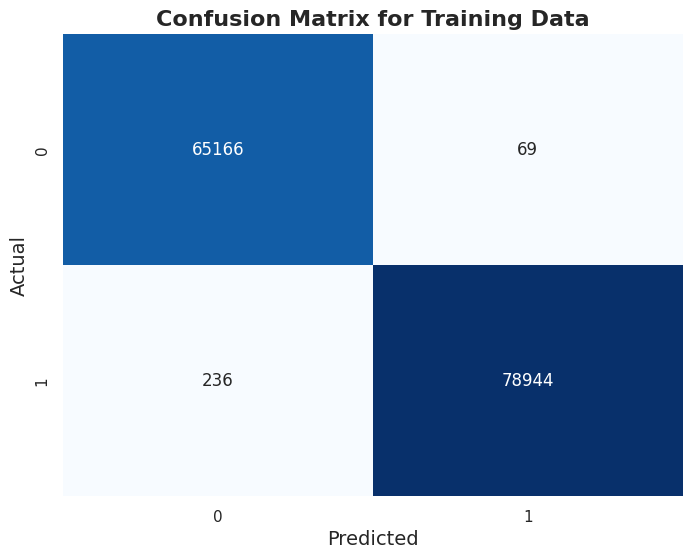

In [ ]:
cm_train = confusion_matrix(y_train, y_train_pred_xgb)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix for Training Data', fontsize=16, fontweight='bold')
plt.xlabel('Predicted', fontsize=14)
plt.ylabel('Actual', fontsize=14)
plt.show()

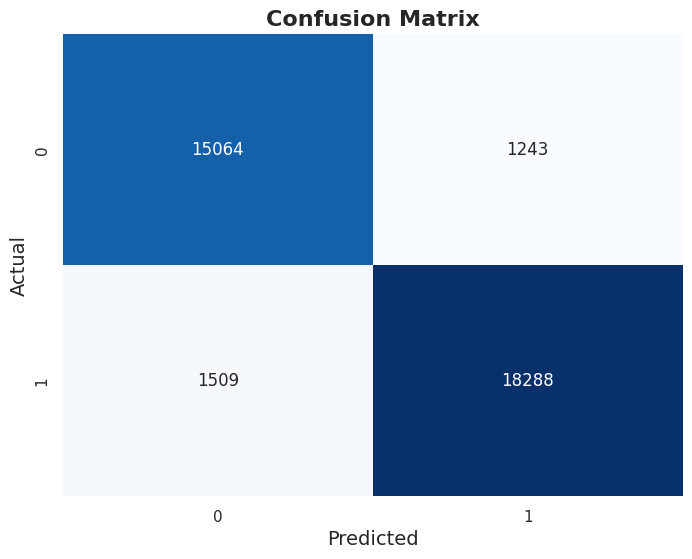

In [ ]:
cm = confusion_matrix(y_test, y_test_pred_xgb)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix', fontsize=16, fontweight='bold')
plt.xlabel('Predicted', fontsize=14)
plt.ylabel('Actual', fontsize=14)
plt.show()

In [ ]:
# calculate rates of FP, FN, TP, and TN
tn, fp, fn, tp = cm.ravel()
fp_prop = fp / (fp + tn)
fn_prop = fn / (fn + tp)
tp_prop = tp / (tp + fn)
tn_prop = tn / (tn + fp)

print(f'FP Rate: {fp_prop:.2f}')
print(f'FN Rate: {fn_prop:.2f}')
print(f'TP Rate: {tp_prop:.2f}')
print(f'TN Rate: {tn_prop:.2f}')

FP Rate: 0.08
FN Rate: 0.08
TP Rate: 0.92
TN Rate: 0.92


**Interpretations** :
* **False Positive Rate (0.08)**

About 8% of on-time delivery were incorrectly predicted as late delivery risk. This low FP rate indicates that the model can minimize economic losses due to additional intervention cost to make the delivery on-time

* **False Negative Rate (0.08)**

About 8% of late delivery were incorrectly predicted as on-time. This can be concerning because late delivery can decrease customer satisfaction which may impact revenue

# **MODEL INTERPRETATION**

XGBoost is a black-box model which is difficult to interpret factors influencing customer churn. SHAP (SHapley Additive exPlanations) is a technique that can be used to interpret model predictions by making attributes of importance scores to input features. Since XGBoost model after hyperparameter tuning performs better than the baselin model, the optimized XGBoost model will be used for SHAP analysis

## **Summary Plot**

In [ ]:
# import necessary library
from shap import TreeExplainer

# initialize SHAP explainer
shap_explainer = TreeExplainer(best_model_xgb)
shap_values = shap_explainer(X_test)

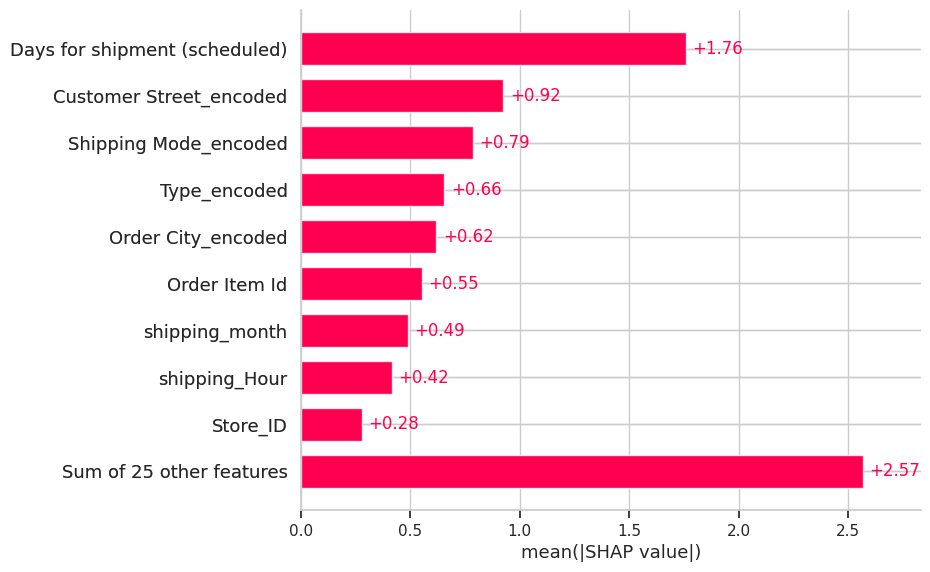

In [ ]:
shap.plots.bar(shap_values)

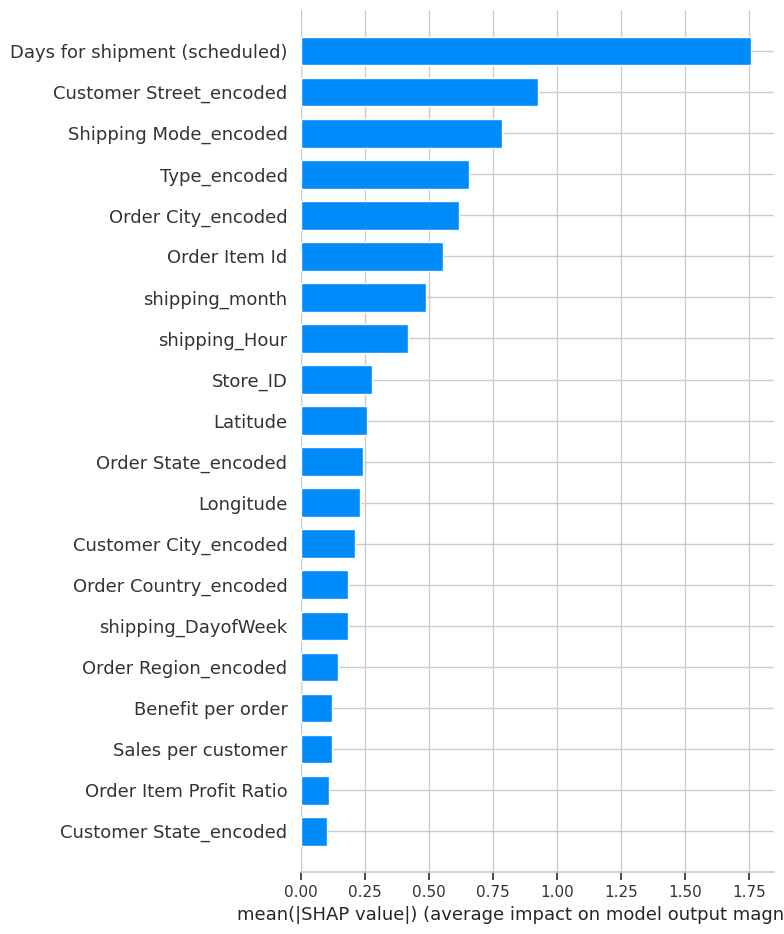

In [ ]:
# create SHAP summary plot
shap.summary_plot(shap_values, X_train, plot_type='bar')

Features importance from XGBoost model's prediction :
* `Days for shipment (scheduled)` : this feature has the highest importance (+1.76) for predicting late delivery risk. The result highlights that estimating the required shipping days is essential to reduce the probability of delayed delivery by allocating resources and time efficiently
* `Customer Street_encoded` : although customer street is not directly related to order destination, this feature ranks second for the highest importance (+0.92)
* `Shipping Mode_encoded` : this feature ranks third for the highest importance (+0.79). As shown in the EDA section, the choice of shipping mode influence the probability of delayed delivery
* `Order City_en_encoded` and `Type_encoded` : these features have relatively high importance (+0.62 and +0.66, respectively) which indicate that payment type and destination city influence late delivery risk. This makes sense since order destination is related to distance. Meanwhile, the duration of payment confirmation can also influence late delivery
* `shipping_month` and `shipping_hours` : some months/hours with high shipping volumes led to higher late delivery risk


## **Force Plot**

The SHAP force plot shows which features had the most influence on the model's prediction for a single observation. In this case, the first sample from testing data will be visualized using force plot

In [ ]:
shap.initjs()
shap.force_plot(shap_explainer.expected_value,shap_values.values[0], features=X_test.iloc[0])

It can be seen that f(x) = 0.82. This value is not the actual churn probability. We need to calculate the churn probability using sigmoid function

In [ ]:
# logit f(x)
fx = 0.82

# sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# calculate probability
prob = sigmoid(fx)

print(f"f(x) = {fx}")
print(f"Sigmoid(f(x)) = {prob:.6f}")

f(x) = 0.82
Sigmoid(f(x)) = 0.694236


In [ ]:
y_test_pred_xgb[0]

1

**Interpretation:**

**XGBoost model predicts that the first order from testing data is likely to be late.** This can be interpreted from the relatively high SHAP value (f(x) = 0.82), which after applying the sigmoid function gives a probability close to 1


Force plot shows which features are driving this order to be late with red representing features that pushed the model score higher (towards late) and blue representing features that pushed the score lower (towards on-time). XGBoost model starts with base value of 0.226. Although the feature **`Days for shipment (scheduled)` had a large negative contribution (red) of 0.777** that pushed the prediction towards on-time, **other features such as`Store_ID`, `Customer Street_encoded`, and `Order Item Id` pushed the score up**, resulting in a final SHAP value of approximately 0.82 which corresponds to a moderate late probability (0.69 close to 1)

# **BUSINESS RECOMMENDATIONS**

**1. Adjust Shipping Schedules**
* Develop model to estimate actual shipping days more accurately
* Extend shipping days to lower late delivery risk

**2. Optimize Warehouse Locations**
* Establish warehouses near regions with the highest number of orders
* **Cons** : need high cost to build new warehouses

**3. Route Optimization**
* Develop routing algorithm to make shipping efficient
* Cluster nearby regions, so deliveries can be completed faster and more efficiently

**4. Optimize Shipping Mode Performance**
* Evaluate First Class shipping mode and improve its performance
* Remove shipping modes with low on-time rate and high costs

**5. Plan Shipping During Peak Seasons/Hours**
* Allocate extra resources during peak months
* Prioritize early day shipping for high-risk orders

**6. Optimize Payment Process**
* Speed up payment confirmation to reduce delays





# **ROOM FOR IMPROVEMENT**

**1. Address Overfitting**

After tuning, XGBoost model experiences overfitting. To deal with overfitting, some solutions can be :Feature engineering, collect data on new features (weather, distance, etc), simplify the model

**2. Monitor Performance**

In real-life problem, the company still need maintain the good performance of developed model.Track accuracy regularly and refine the model if the accuracy worsened

**3. Deploy Model**

Implement model in the company system either via web or app


# **SAVE MODEL**

Save the best model for deployment

In [ ]:
import pickle
feature_names = X_train.columns.tolist()

# save pickle file
with open("/content/drive/My Drive/Bootcamp/Final Project/Data Science/xgb_best.pkl", "wb") as f:
    pickle.dump((best_model_xgb, feature_names), f)